# Forecasting Agricultural CO2 Emissions

## Install and load the necessary packages and libraries

In [ ]:
# Load the necessary packages and libaries

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error,mean_squared_error, r2_score

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

## Data Overview

In [ ]:
# Load the data from the CSV file into the dataframe
df = pd.read_csv("Agrofood_co2_emission.csv")
df.head()

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   
1         61.2125   -2388.803  ...           342.3079                     0.0   
2         53.3170   -2388.803  ...           349.1224                     0.0   
3         54.3617   -2388.803  ...           352.2947                     0.0   
4         53.9874   -2388.803  ...           367.6784                     0.0   

   Fires in humid tropical forests  On-farm energy use  Rural population  \
0                              0.0                 NaN           9655167   
1                              0.0                 NaN          10230490   
2                              0.0                 NaN          10995568   
3                              0.0                 NaN          11858090   
4                              0.0                 NaN          12690115   

   Urban population  Total Population - Male  Total Population - Female  \
0           2593947                5348387.0                  5346409.0   
1           2763167                5372959.0                  5372208.0   
2           2985663                6028494.0                  6028939.0   
3           3237009                7003641.0                  7000119.0   
4           3482604                7733458.0                  7722096.0   

   total_emission  Average Temperature °C  
0     2198.963539                0.536167  
1     2323.876629                0.020667  
2     2356.304229               -0.259583  
3     2368.470529                0.101917  
4     2500.768729                0.372250  

[5 rows x 31 columns]

### **Data Dictionary:**

* **Area:** 236 subnational and national level area.
* **Year:** Years recorded between 1990 to 2020.
* **Savanna fires:** Emissions from fires in savanna ecosystems.
* **Forest fires:** Emissions from fires in forested areas.
* **Crop Residues:** Emissions from burning or decomposing leftover plant material after crop harvesting.
* **Rice Cultivation:** Emissions from methane released during rice cultivation.
* **Drained organic soils (CO2):** Emissions from carbon dioxide released when draining organic soils.
* **Pesticides Manufacturing:** Emissions from the production of pesticides.
* **Food Transport:** Emissions from transporting food products.
* **Forestland:** Land covered by forests.
* **Net Forest conversion:** Change in forest area due to deforestation and afforestation.
* **Food Household Consumption:** Emissions from food consumption at the household level.
* **Food Retail:** Emissions from the operation of retail establishments selling food.
* **On-farm Electricity Use:** Electricity consumption on farms.
* **Food Packaging:** Emissions from the production and disposal of food packaging materials.
* **Agrifood Systems Waste Disposal:** Emissions from waste disposal in the agrifood system.
* **Food Processing:**Emissions from processing food products.
* **Fertilizers Manufacturing:** Emissions from the production of fertilizers.
* **IPPU (Industrial Processes and Product Use):** Emissions from industrial processes and product use.
* **Manure applied to Soils:** Emissions from applying animal manure to agricultural soils.
* **Manure left on Pasture:** Emissions from animal manure on pasture or grazing land.
* **Manure Management:** Emissions from managing and treating animal manure.
* **Fires in organic soils:** Emissions from fires in organic soils.
* **Fires in humid tropical forests:** Emissions from fires in humid tropical forests.
* **On-farm energy use:** Energy consumption on farms.
* **Rural population:** Number of people living in rural areas.
* **Urban population:** Number of people living in urban areas.
* **Total Population - Male:** Total number of male individuals in the population.
* **Total Population - Female:**Total number of female individuals in the population.
* **Total CO2 emission:**Total greenhouse gas emissions from various sources.
* **Change in Average Annual Temperature:** The average increasing of temperature (by year) in degrees Celsius.

In [ ]:
# Checking what kinds of data we have
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [ ]:
df.shape

(6965, 31)

In [ ]:
#df.describe().loc[['count', 'mean', 'std']]
df.describe().T

count          mean           std  \
Year                             6965.0  2.005125e+03  8.894665e+00   
Savanna fires                    6934.0  1.188391e+03  5.246288e+03   
Forest fires                     6872.0  9.193022e+02  3.720079e+03   
Crop Residues                    5576.0  9.987063e+02  3.700345e+03   
Rice Cultivation                 6965.0  4.259667e+03  1.761383e+04   
Drained organic soils (CO2)      6965.0  3.503229e+03  1.586145e+04   
Pesticides Manufacturing         6965.0  3.334184e+02  1.429159e+03   
Food Transport                   6965.0  1.939582e+03  5.616749e+03   
Forestland                       6472.0 -1.782829e+04  8.183221e+04   
Net Forest conversion            6472.0  1.760564e+04  1.011575e+05   
Food Household Consumption       6492.0  4.847580e+03  2.578914e+04   
Food Retail                      6965.0  2.043211e+03  8.494249e+03   
On-farm Electricity Use          6965.0  1.626681e+03  9.343182e+03   
Food Packaging                   6965.0  1.658630e+03  1.148134e+04   
Agrifood Systems Waste Disposal  6965.0  6.018445e+03  2.215674e+04   
Food Processing                  6965.0  3.872724e+03  1.983822e+04   
Fertilizers Manufacturing        6965.0  3.035723e+03  1.169303e+04   
IPPU                             6222.0  1.999150e+04  1.114209e+05   
Manure applied to Soils          6037.0  9.232256e+02  3.226992e+03   
Manure left on Pasture           6965.0  3.518027e+03  9.103556e+03   
Manure Management                6037.0  2.263345e+03  7.980542e+03   
Fires in organic soils           6965.0  1.210316e+03  2.266985e+04   
Fires in humid tropical forests  6810.0  6.684529e+02  3.264879e+03   
On-farm energy use               6009.0  3.008982e+03  1.263786e+04   
Rural population                 6965.0  1.785774e+07  8.901521e+07   
Urban population                 6965.0  1.693230e+07  6.574362e+07   
Total Population - Male          6965.0  1.761963e+07  7.603993e+07   
Total Population - Female        6965.0  1.732447e+07  7.251711e+07   
total_emission                   6965.0  6.409124e+04  2.283130e+05   
Average Temperature °C           6965.0  8.729891e-01  5.559295e-01   

                                           min            25%           50%  \
Year                               1990.000000    1997.000000  2.005000e+03   
Savanna fires                         0.000000       0.000000  1.651850e+00   
Forest fires                          0.000000       0.000000  5.179000e-01   
Crop Residues                         0.000200      11.006525  1.036982e+02   
Rice Cultivation                      0.000000     181.260800  5.348174e+02   
Drained organic soils (CO2)           0.000000       0.000000  0.000000e+00   
Pesticides Manufacturing              0.000000       6.000000  1.300000e+01   
Food Transport                        0.000100      27.958600  2.049628e+02   
Forestland                      -797183.079000   -2848.350000 -6.292000e+01   
Net Forest conversion                 0.000000       0.000000  4.444000e+01   
Food Household Consumption            0.000000      11.399950  1.554711e+02   
Food Retail                           0.000000      26.818500  1.720426e+02   
On-farm Electricity Use               0.000000       8.037600  2.912070e+01   
Food Packaging                        0.000000      67.631366  7.401813e+01   
Agrifood Systems Waste Disposal       0.340000      86.680500  9.012757e+02   
Food Processing                       0.000100     209.587728  3.447602e+02   
Fertilizers Manufacturing             0.001900     360.358799  1.115052e+03   
IPPU                                  0.000000      39.031525  8.037066e+02   
Manure applied to Soils               0.049000      16.303000  1.204439e+02   
Manure left on Pasture                0.000700     139.669900  9.725674e+02   
Manure Management                     0.432900      37.632100  2.698563e+02   
Fires in organic soils                0.000000       0.000000  0.000000e+00   
Fires in humid 

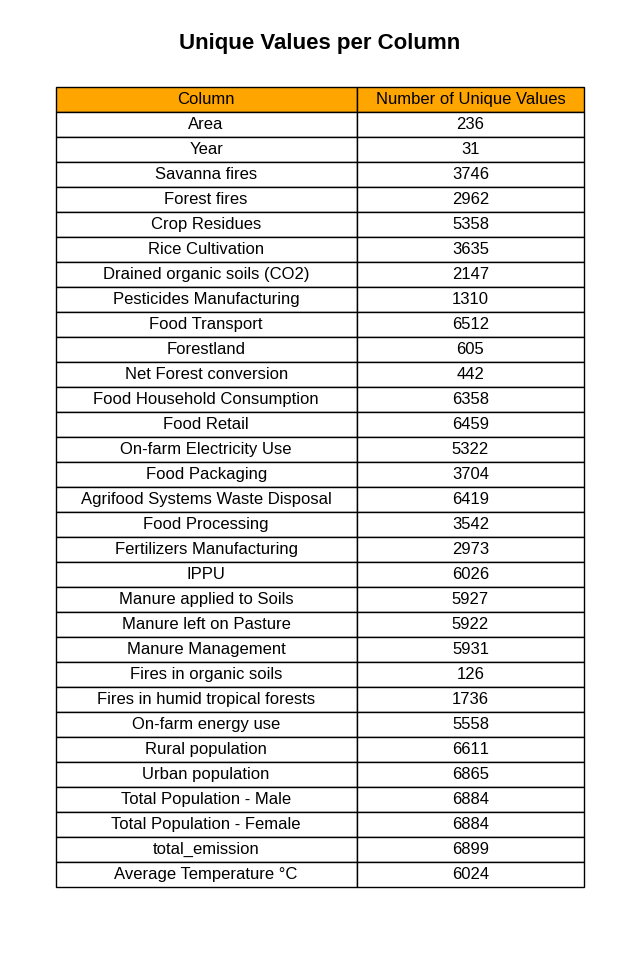

In [ ]:
# For data visualization purpose

# Calculate unique values
unique_values = df.nunique()

# Create a DataFrame for the table
unique_values_df = unique_values.to_frame(name='Number of Unique Values').reset_index()
unique_values_df.columns = ['Column', 'Number of Unique Values']

# Set the style for the table
# Increase the figure height to add more vertical space
plt.figure(figsize=(8, len(unique_values_df) * 0.4))  # Adjust figure size as needed
ax = plt.gca()
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=unique_values_df.values,
                 colLabels=unique_values_df.columns,
                 loc='center',
                 cellLoc='center',
                 colColours=["orange"] * len(unique_values_df.columns),  # Set column header color to orange
                 colLoc='center')

# Enhance table style
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(unique_values_df.columns))))  # Adjust to fit column contents
# Increase padding within cells for better readability
table.scale(1, 1.5)

# Add a main title
plt.title('Unique Values per Column', fontsize=16, fontweight='bold', y=0.95)  # Adjust y for title position

# Display the table
plt.show()

In [ ]:
# Calculating number of unique values and null values for each column
unique_counts = df.nunique()
null_counts = df.isnull().sum()

# Creating a DataFrame to display the results
summary_df = pd.DataFrame({
    "Unique Values": unique_counts,
    "Null Values": null_counts
})

# Calculating the distribution of null values across the dataset
null_distribution = null_counts / len(df) * 100

# Adding distribution to the summary DataFrame
summary_df['Null Value Distribution (%)'] = null_distribution

summary_df

Unique Values  Null Values  \
Area                                       236            0   
Year                                        31            0   
Savanna fires                             3746           31   
Forest fires                              2962           93   
Crop Residues                             5358         1389   
Rice Cultivation                          3635            0   
Drained organic soils (CO2)               2147            0   
Pesticides Manufacturing                  1310            0   
Food Transport                            6512            0   
Forestland                                 605          493   
Net Forest conversion                      442          493   
Food Household Consumption                6358          473   
Food Retail                               6459            0   
On-farm Electricity Use                   5322            0   
Food Packaging                            3704            0   
Agrifood Systems Waste Disposal           6419            0   
Food Processing                           3542            0   
Fertilizers Manufacturing                 2973            0   
IPPU                                      6026          743   
Manure applied to Soils                   5927          928   
Manure left on Pasture                    5922            0   
Manure Management                         5931          928   
Fires in organic soils                     126            0   
Fires in humid tropical forests           1736          155   
On-farm energy use                        5558          956   
Rural population                          6611            0   
Urban population                          6865            0   
Total Population - Male                   6884            0   
Total Population - Female                 6884            0   
total_emission                            6899            0   
Average Temperature °C                    6024            0   

                                 Null Value Distribution (%)  
Area                                                0.000000  
Year                                                0.000000  
Savanna fires                                       0.445083  
Forest fires                                        1.335248  
Crop Residues                                      19.942570  
Rice Cultivation                                    0.000000  
Drained organic soils (CO2)                         0.000000  
Pesticides Manufacturing                            0.000000  
Food Transport                                      0.000000  
Forestland                                          7.078248  
Net Forest conversion                               7.078248  
Food Household Consumption                          6.791098  
Food Retail                                         0.000000  
On-farm Electricity Use                             0.000000  
Food Packaging                                      0.000000  
Agrifood Systems Waste Disposal                     0.000000  
Food Processing                                     0.000000  
Fertilizers Manufacturing                           0.000000  
IPPU                                               10.667624  
Manure applied to Soils                            13.323762  
Manure left on Pasture                              0.000000  
Manure Management                                  13.323762  
Fires in organic soils                              0.000000  
Fires in humid tropical forests                     2.225413  
On-farm energy use                                 13.725772  
Rural population                                    0.000000  
Urban population                                    0.000000  
Total Population - Male                             0.000000  
Total Population - Female                           0.000000  
total_emission                                      0.000000  
Average Temperature °C                              0.000000

Figure out how many percentage of actual values are there in Fires in organic soils

In [ ]:
# Count non-zero values for Fires in organic soils
non_zero_count = (df["Fires in organic soils"] != 0).sum()

# Count total non-NA/null values
total_non_null = df["Fires in organic soils"].notnull().sum()

# Calculate percentage of non-zero values
percentage_non_zero = (non_zero_count / total_non_null) * 100

print(f"Percentage of non-zero values in Fires in organic soils: {percentage_non_zero}%")

Percentage of non-zero values in Fires in organic soils: 4.436468054558507%


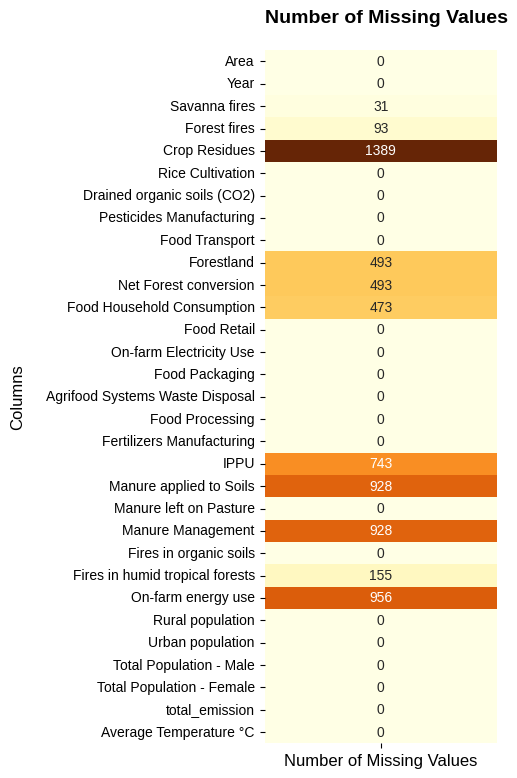

In [ ]:
# For data visualization purpose

# Set the font to Verdana for all text in the figures
matplotlib.rcParams['font.sans-serif'] = "Liberation Sans"
matplotlib.rcParams['font.family'] = "sans-serif"

# Calculate missing values
missing_values = df.isna().sum()

# Create a DataFrame with a generic column name that won't be displayed
missing_values_df = missing_values.to_frame(name='')

# Creating a heatmap
fig_missing_values = plt.figure(figsize=(3, 9))
ax = sns.heatmap(missing_values_df, cmap='YlOrBr', annot=True, fmt='d', cbar=False)

# Customize the chart
plt.title('Number of Missing Values', pad=20, loc='left', fontweight='bold', fontsize=14)
plt.yticks(rotation=0)
plt.ylabel('Columns', labelpad=15, fontsize=12)

# Customize the x-axis tick labels
ax.set_xticklabels(['Number of Missing Values'], fontsize=12)

# Display the chart
plt.show()

In [ ]:
# Load the data from the CSV file into the dataframe
df2 = pd.read_csv("GDP.csv")
df2

Area  Year  GDP Per Capita (Current US$)
0     Afghanistan  1990                           NaN
1     Afghanistan  1991                           NaN
2     Afghanistan  1992                           NaN
3     Afghanistan  1993                           NaN
4     Afghanistan  1994                           NaN
...           ...   ...                           ...
6722     Zimbabwe  2016                   1421.787791
6723     Zimbabwe  2017                   1192.107012
6724     Zimbabwe  2018                   2269.177012
6725     Zimbabwe  2019                   1421.868596
6726     Zimbabwe  2020                   1372.696674

[6727 rows x 3 columns]

## Data Cleaning & Preprocessing

In [ ]:
# Rename columns for df
df = df.rename(columns={'total_emission': 'Total CO2 Emission'})
df = df.rename(columns={'Average Temperature °C': 'Change in Average Annual Temperature'})
df = df.rename(columns={'Savanna fires': 'Savanna Fires'})
df = df.rename(columns={'Forest fires': 'Forest Fires'})
df = df.rename(columns={'Rural population': 'Rural Population'})
df = df.rename(columns={'Urban population': 'Urban Population'})

# Unify 'China' and 'China, mainland' under a single label 'China'
df['Area'] = df['Area'].replace({'China, mainland': 'China'})

df

Area  Year  Savanna Fires  Forest Fires  Crop Residues  \
0     Afghanistan  1990        14.7237        0.0557       205.6077   
1     Afghanistan  1991        14.7237        0.0557       209.4971   
2     Afghanistan  1992        14.7237        0.0557       196.5341   
3     Afghanistan  1993        14.7237        0.0557       230.8175   
4     Afghanistan  1994        14.7237        0.0557       242.0494   
...           ...   ...            ...           ...            ...   
6960     Zimbabwe  2016      1190.0089      232.5068        70.9451   
6961     Zimbabwe  2017      1431.1407      131.1324       108.6262   
6962     Zimbabwe  2018      1557.5830      221.6222       109.9835   
6963     Zimbabwe  2019      1591.6049      171.0262        45.4574   
6964     Zimbabwe  2020       481.9027       48.4197       108.3022   

      Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0             686.0000                          0.0                 11.807483   
1             678.1600                          0.0                 11.712073   
2             686.0000                          0.0                 11.712073   
3             686.0000                          0.0                 11.712073   
4             705.6000                          0.0                 11.712073   
...                ...                          ...                       ...   
6960            7.4088                          0.0                 75.000000   
6961            7.9458                          0.0                 67.000000   
6962            8.1399                          0.0                 66.000000   
6963            7.8322                          0.0                 73.000000   
6964            7.9733                          0.0                 73.000000   

      Food Transport  Forestland  ...  Manure Management  \
0            63.1152  -2388.8030  ...           319.1763   
1            61.2125  -2388.8030  ...           342.3079   
2            53.3170  -2388.8030  ...           349.1224   
3            54.3617  -2388.8030  ...           352.2947   
4            53.9874  -2388.8030  ...           367.6784   
...              ...         ...  ...                ...   
6960        251.1465  76500.2982  ...           282.5994   
6961        255.7975  76500.2982  ...           255.5900   
6962        327.0897  76500.2982  ...           257.2735   
6963        290.1893  76500.2982  ...           267.5224   
6964        238.7639  76500.2982  ...           266.7316   

      Fires in organic soils  Fires in humid tropical forests  \
0                        0.0                              0.0   
1                        0.0                              0.0   
2                        0.0                              0.0   
3                        0.0                              0.0   
4                        0.0                              0.0   
...                      ...                              ...   
6960                     0.0                              0.0   
6961                     0.0                              0.0   
6962                     0.0                              0.0   
6963                     0.0                              0.0   
6964                     0.0                              0.0   

      On-farm energy use  Rural Population  Urban Population  \
0                    NaN           9655167           2593947   
1                    NaN          10230490           2763167   
2                    NaN          10995568           2985663   
3                    NaN          11858090           3237009   
4                    NaN          12690115           3482604   
...                  ...               ...               ...   
6960            417.3150          10934468           5215894   
6961            398.1644          11201138           5328766   
6962            465.7735          11465748           5447513   
6963            444.2335          11725970   

### Handling Missing Values

**Pattern of Missingness:** It appears that for some countries have emission source columns with no values, this might actually represent the absence of emission sources rather than missing data. I strongly believe it genuinely represents the absence of events (e.g. no forest fires). Since it shouldn't be considered as missing data, there is no need for imputation.

In [ ]:
# Replace all null values with 0
df.fillna(0, inplace=True)

In [ ]:
# Drop 'Fires in organic soils'
df = df.drop('Fires in organic soils', axis=1)

In [ ]:
df.isnull().sum()

Area                                    0
Year                                    0
Savanna Fires                           0
Forest Fires                            0
Crop Residues                           0
Rice Cultivation                        0
Drained organic soils (CO2)             0
Pesticides Manufacturing                0
Food Transport                          0
Forestland                              0
Net Forest conversion                   0
Food Household Consumption              0
Food Retail                             0
On-farm Electricity Use                 0
Food Packaging                          0
Agrifood Systems Waste Disposal         0
Food Processing                         0
Fertilizers Manufacturing               0
IPPU                                    0
Manure applied to Soils                 0
Manure left on Pasture                  0
Manure Management                       0
Fires in humid tropical forests         0
On-farm energy use                

### Coefficent Of Variation (After Cleaning The Dataset)

The coefficient of variation should be calculated after cleaning the dataset. Null values can affect the calculation of both the mean and standard deviation.

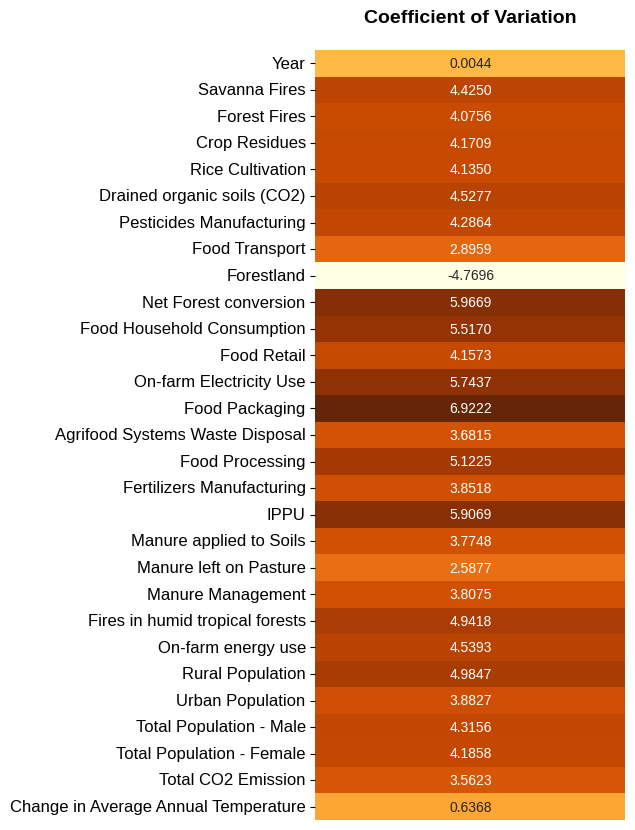

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculate the coefficient of variation for each numeric column
cv = numeric_cols.std() / numeric_cols.mean()

# Convert the cv series to a DataFrame for seaborn heatmap compatibility
cv_df = cv.to_frame().rename(columns={0: 'CV'})

# Set the index name to None for better heatmap y-axis labeling
cv_df.index.name = None

# Set the font for the figures
plt.rcParams['font.sans-serif'] = "Liberation Sans"
plt.rcParams['font.family'] = "sans-serif"

# Creating a heatmap
plt.figure(figsize=(4, 10))
sns.heatmap(cv_df, annot=True, cmap='YlOrBr', cbar=False, fmt=".4f")

# Customize the chart
plt.title('Coefficient of Variation', pad=20, fontweight='bold', fontsize=14)
plt.yticks(rotation=0, fontsize=12)
plt.xticks([])  # Hide x-axis ticks as there's only one column

# Display the chart
plt.show()

In [ ]:
df.describe().T

count          mean           std  \
Year                                  6965.0  2.005125e+03  8.894665e+00   
Savanna Fires                         6965.0  1.183102e+03  5.235196e+03   
Forest Fires                          6965.0  9.070272e+02  3.696662e+03   
Crop Residues                         6965.0  7.995386e+02  3.334784e+03   
Rice Cultivation                      6965.0  4.259667e+03  1.761383e+04   
Drained organic soils (CO2)           6965.0  3.503229e+03  1.586145e+04   
Pesticides Manufacturing              6965.0  3.334184e+02  1.429159e+03   
Food Transport                        6965.0  1.939582e+03  5.616749e+03   
Forestland                            6965.0 -1.656636e+04  7.901491e+04   
Net Forest conversion                 6965.0  1.635947e+04  9.761571e+04   
Food Household Consumption            6965.0  4.518376e+03  2.492779e+04   
Food Retail                           6965.0  2.043211e+03  8.494249e+03   
On-farm Electricity Use               6965.0  1.626681e+03  9.343182e+03   
Food Packaging                        6965.0  1.658630e+03  1.148134e+04   
Agrifood Systems Waste Disposal       6965.0  6.018445e+03  2.215674e+04   
Food Processing                       6965.0  3.872724e+03  1.983822e+04   
Fertilizers Manufacturing             6965.0  3.035723e+03  1.169303e+04   
IPPU                                  6965.0  1.785888e+04  1.054901e+05   
Manure applied to Soils               6965.0  8.002172e+02  3.020639e+03   
Manure left on Pasture                6965.0  3.518027e+03  9.103556e+03   
Manure Management                     6965.0  1.961782e+03  7.469521e+03   
Fires in humid tropical forests       6965.0  6.535771e+02  3.229847e+03   
On-farm energy use                    6965.0  2.595976e+03  1.178400e+04   
Rural Population                      6965.0  1.785774e+07  8.901521e+07   
Urban Population                      6965.0  1.693230e+07  6.574362e+07   
Total Population - Male               6965.0  1.761963e+07  7.603993e+07   
Total Population - Female             6965.0  1.732447e+07  7.251711e+07   
Total CO2 Emission                    6965.0  6.409124e+04  2.283130e+05   
Change in Average Annual Temperature  6965.0  8.729891e-01  5.559295e-01   

                                                min            25%  \
Year                                    1990.000000    1997.000000   
Savanna Fires                              0.000000       0.000000   
Forest Fires                               0.000000       0.000000   
Crop Residues                              0.000000       0.028400   
Rice Cultivation                           0.000000     181.260800   
Drained organic soils (CO2)                0.000000       0.000000   
Pesticides Manufacturing                   0.000000       6.000000   
Food Transport                             0.000100      27.958600   
Forestland                           -797183.079000   -2299.387200   
Net Forest conversion                      0.000000       0.000000   
Food Household Consumption                 0.000000       6.089100   
Food Retail                                0.000000      26.818500   
On-farm Electricity Use                    0.000000       8.037600   
Food Packaging                             0.000000      67.631366   
Agrifood Systems Waste Disposal            0.340000      86.680500   
Food Processing                            0.000100     209.587728   
Fertilizers Manufacturing                  0.001900     360.358799   
IPPU                                       0.000000       9.236700   
Manure applied to Soils                    0.000000       3.946700   
Manure left on Pasture                     0.000700     139.669900   
Manure Management                          0.000000      11.038100   
Fires in humid tropical forests            0.000000       0.000000   
On-farm energy use                         0.000000       5.013600   
Rural Population                           0.000000   97311.000000   
Urban Po

### Categorize all areas into 6 major continents

In [ ]:
area_to_continent = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'American Samoa': 'Oceania',
    'Andorra': 'Europe',
    'Angola': 'Africa',
    'Anguilla': 'North America',
    'Antigua and Barbuda': 'North America',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belgium-Luxembourg': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bermuda': 'North America',
    'Bhutan': 'Asia',
    'Bolivia (Plurinational State of)': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'British Virgin Islands': 'North America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cabo Verde': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Cayman Islands': 'North America',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Channel Islands': 'Europe',
    'Chile': 'South America',
    'China': 'Asia',
    'China, Hong Kong SAR': 'Asia',
    'China, Macao SAR': 'Asia',
    'China, mainland': 'Asia',
    'China, Taiwan Province of': 'Asia',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Congo': 'Africa',
    'Cook Islands': 'Oceania',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Czechoslovakia': 'Europe',
    "Democratic People's Republic of Korea": 'Asia',
    'Democratic Republic of the Congo': 'Africa',
    'Denmark': 'Europe',
    'Djibouti': 'Africa',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Eswatini': 'Africa',
    'Ethiopia': 'Africa',
    'Ethiopia PDR': 'Africa',
    'Falkland Islands (Malvinas)': 'South America',
    'Faroe Islands': 'Europe',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'French Polynesia': 'Oceania',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Gibraltar': 'Europe',
    'Greece': 'Europe',
    'Greenland': 'North America',
    'Grenada': 'North America',
    'Guadeloupe': 'North America',
    'Guam': 'Oceania',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Holy See': 'Europe',
    'Honduras': 'North America',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran (Islamic Republic of)': 'Asia',
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Isle of Man': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kiribati': 'Oceania',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    "Lao People's Democratic Republic": 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Marshall Islands': 'Oceania',
    'Martinique': 'North America',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mayotte': 'Africa',
    'Mexico': 'North America',
    'Micronesia (Federated States of)': 'Oceania',
    'Monaco': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Montserrat': 'North America',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nauru': 'Oceania',
    'Nepal': 'Asia',
    'Netherlands (Kingdom of the)': 'Europe',
    'Netherlands Antilles (former)': 'Europe',
    'New Caledonia': 'Oceania',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Niue': 'Oceania',
    'North Macedonia': 'Europe',
    'Northern Mariana Islands': 'Oceania',
    'Norway': 'Europe',
    'Oman': 'Asia',
    'Pacific Islands Trust Territory': 'Oceania',
    'Pakistan': 'Asia',
    'Palau': 'Oceania',
    'Palestine': 'Asia',
    'Panama': 'North America',
    'Papua New Guinea': 'Oceania',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Puerto Rico': 'North America',
    'Qatar': 'Asia',
    'Republic of Korea': 'Asia',
    'Republic of Moldova': 'Europe',
    'Romania': 'Europe',
    'Russian Federation': 'Europe',
    'Rwanda': 'Africa',
    'Saint Helena, Ascension and Tristan da Cunha': 'Africa',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Pierre and Miquelon': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Oceania',
    'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Serbia and Montenegro': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Sudan': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sudan': 'Africa',
    'Sudan (former)': 'Africa',
    'Suriname': 'South America',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Syrian Arab Republic': 'Asia',
    'Tajikistan': 'Asia',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Togo': 'Africa',
    'Tokelau': 'Oceania',
    'Tonga': 'Oceania',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa',
    'Turkmenistan': 'Asia',
    'Turks and Caicos Islands': 'North America',
    'Tuvalu': 'Oceania',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom of Great Britain and Northern Ireland': 'Europe',
    'United Republic of Tanzania': 'Africa',
    'United States of America': 'North America',
    'United States Virgin Islands': 'North America',
    'Uruguay': 'South America',
    'USSR': 'Europe',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Oceania',
    'Venezuela (Bolivarian Republic of)': 'South America',
    'Viet Nam': 'Asia',
    'Wallis and Futuna Islands': 'Oceania',
    'Western Sahara': 'Africa',
    'Yemen': 'Asia',
    'Yugoslav SFR': 'Europe',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa'}


df['Continent'] = df['Area'].replace(area_to_continent)
df.head(7)

Area  Year  Savanna Fires  Forest Fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   
5  Afghanistan  1995        14.7237        0.0557       243.8152   
6  Afghanistan  1996        38.9302        0.2014       249.0364   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   
5            666.40                          0.0                 11.712073   
6            686.00                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  \
0         63.1152   -2388.803  ...           319.1763   
1         61.2125   -2388.803  ...           342.3079   
2         53.3170   -2388.803  ...           349.1224   
3         54.3617   -2388.803  ...           352.2947   
4         53.9874   -2388.803  ...           367.6784   
5         54.6445   -2388.803  ...           397.5498   
6         53.1637   -2388.803  ...           465.2050   

   Fires in humid tropical forests  On-farm energy use  Rural Population  \
0                              0.0                 0.0           9655167   
1                              0.0                 0.0          10230490   
2                              0.0                 0.0          10995568   
3                              0.0                 0.0          11858090   
4                              0.0                 0.0          12690115   
5                              0.0                 0.0          13401971   
6                              0.0                 0.0          13952791   

   Urban Population  Total Population - Male  Total Population - Female  \
0           2593947                5348387.0                  5346409.0   
1           2763167                5372959.0                  5372208.0   
2           2985663                6028494.0                  6028939.0   
3           3237009                7003641.0                  7000119.0   
4           3482604                7733458.0                  7722096.0   
5           3697570                8219467.0                  8199445.0   
6           3870093                8569175.0                  8537421.0   

   Total CO2 Emission  Change in Average Annual Temperature  Continent  
0         2198.963539                              0.536167       Asia  
1         2323.876629                              0.020667       Asia  
2         2356.304229                             -0.259583       Asia  
3         2368.470529                              0.101917       Asia  
4         2500.768729                              0.372250       Asia  
5         2624.612529                              0.285583       Asia  
6         2838.921329                              0.036583       Asia  

[7 rows x 31 columns]

In [ ]:
# Identify areas not mapped to a continent
unmapped_areas = df[~df['Continent'].isin(area_to_continent.values())]['Area'].unique()
print(f"Unmapped areas: {unmapped_areas}")

Unmapped areas: []


In [ ]:
df['Continent'].value_counts()

Africa           1711
Asia             1565
Europe           1460
North America    1116
Oceania           710
South America     403
Name: Continent, dtype: int64

In [ ]:
len(area_to_continent)

236

### Create aggregate columns to understand the broader impact of different sectors on CO2 emissions

In [ ]:
# Grouping the specified columns into a new category 'LULUCF'
df['LULUCF'] = df[
    ['Savanna Fires', 'Forest Fires', 'Drained organic soils (CO2)', 'Forestland',
     'Net Forest conversion', 'Fires in humid tropical forests']
].sum(axis=1)

df[['LULUCF']].head()

LULUCF
0 -2374.0236
1 -2374.0236
2 -2374.0236
3 -2374.0236
4 -2374.0236

In [ ]:
# Grouping the specified columns into a new category Agricultural Activities'
df['Agricultural Activities'] = df[
    ['Crop Residues', 'Rice Cultivation', 'On-farm Electricity Use', 'Manure applied to Soils',
     'Manure left on Pasture', 'Manure Management', 'On-farm energy use']
].sum(axis=1)

df[['Agricultural Activities']].head()

Agricultural Activities
0                3075.7256
1                3167.2488
2                3159.2283
3                3182.8601
4                3280.7052

In [ ]:
# Grouping the specified columns into a new category 'Food Supply Chain'
df['Food Supply Chain'] = df[
    ['Food Transport', 'Food Household Consumption', 'Food Retail', 'Food Packaging',
     'Agrifood Systems Waste Disposal', 'Food Processing']
].sum(axis=1)

df[['Food Supply Chain']].head()

Food Supply Chain
0        1263.479256
1        1289.046656
2        1323.778956
3        1332.660356
4        1384.957656

In [ ]:
# Grouping the specified columns into a new category 'Industrial Process'
df['Industrial Process'] = df[
    ['Pesticides Manufacturing', 'Fertilizers Manufacturing', 'IPPU']
].sum(axis=1)

df[['Industrial Process']].head()

Industrial Process
0          233.782283
1          241.604773
2          247.320573
3          226.973673
4          209.129473

## Exploratory Data Analysis (EDA)

## Examining outliers
Check values outside of 0.25 and 0.75 quartiles

In [ ]:
# Loop through each numeric column and create a boxplot
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    fig = px.box(df, y=column, title=f'Boxplot of {column}')
    fig.show()

### Analyzing for all 6 continents

Box plot of average temperature distribution by years

In [ ]:
def plot_co2_trend(nation):
    ita = df.loc[df.Area == nation]
    ita = ita.set_index("Year")
    plt.figure(figsize=(10,6))
    ita["Total CO2 Emission"].plot(kind = "line", color = "green")
    plt.title(f"{nation} CO2 trend")
    plt.show()

fig = px.box(df, x="Year",
             y="Change in Average Annual Temperature",
             color="Year",
             color_discrete_sequence=px.colors.sequential.Viridis,
             title='<b>Change in average annual temperature distribution by years')
fig.show()

Time Series of CO2 Emission vs. Temperature (in Celcius) Change in all 6 continents

In [ ]:
# Normalize the data to ensure that each variable has a comparable scale
def normalizer(df):
    #norm = (df - df.max()) / (df.max() - df.min())
    # Revised normalization to scale between 0 and 1
    norm = (df - df.min()) / (df.max() - df.min())
    return norm

temp_emission = df.groupby("Year").agg({"Change in Average Annual Temperature": "mean",
                                           "Total CO2 Emission": "mean",
                                           "Rural Population": "mean",
                                           "Urban Population": "mean"})

norm_temp = normalizer(temp_emission)

# Create a Plotly figure
fig = go.Figure()

# Add traces for each variable
fig.add_trace(go.Scatter(x=norm_temp.index, y=norm_temp['Total CO2 Emission'], mode='lines', name='Total Emission'))
fig.add_trace(go.Scatter(x=norm_temp.index, y=norm_temp['Change in Average Annual Temperature'], mode='lines', name='Change in Average Annual Temperature'))
#fig.add_trace(go.Scatter(x=norm_temp.index, y=norm_temp['Rural population'], mode='lines', name='Rural Population'))
fig.add_trace(go.Scatter(x=norm_temp.index, y=norm_temp['Urban Population'], mode='lines', name='Urban Population'))

# Customize the layout
fig.update_layout(title='<b>Normalized CO2 Emission vs. Change in Average Annual Temperature (in Celcius) in all 6 continents<b>',
                  xaxis_title='Year',
                  yaxis_title='Normalized Values')

# Show the figure
fig.show()

Time Series of CO2 Emission vs. Temperature (in Celcius) Change in Africa

In [ ]:
# Filter for the continent of Africa
africa_df = df[df['Continent'] == 'Africa']

# Normalize the data to ensure that each variable has a comparable scale
def normalizer(df):
    #norm = (df - df.max()) / (df.max() - df.min())
    # Revised normalization to scale between 0 and 1
    norm = (df - df.min()) / (df.max() - df.min())
    return norm

temp_emission_africa = africa_df.groupby("Year").agg({"Change in Average Annual Temperature": "mean",
                                                  "Total CO2 Emission": "mean"})

norm_temp_africa = normalizer(temp_emission_africa)

# Create a Plotly figure
fig = go.Figure()

# Add traces for 'Total CO2 Emission' and 'Change in Average Annual Temperature'
fig.add_trace(go.Scatter(x=norm_temp_africa.index, y=norm_temp_africa['Total CO2 Emission'], mode='lines', name='Total CO2 Emission'))
fig.add_trace(go.Scatter(x=norm_temp_africa.index, y=norm_temp_africa['Change in Average Annual Temperature'], mode='lines', name='Change in Average Annual Temperature'))

# Customize the layout
fig.update_layout(title='<b>Normalized CO2 Emission vs. Change in Average Annual Temperature (in Celsius) in Africa<b>',
                  xaxis_title='Year',
                  yaxis_title='Normalized Values')

# Show the figure
fig.show()

Time Series of CO2 Emission vs. Temperature (in Celcius) Change in Asia

In [ ]:
# Filter for the continent of Asia
asia_df = df[df['Continent'] == 'Asia']

# Normalize the data to ensure that each variable has a comparable scale
def normalizer(df):
    #norm = (df - df.max()) / (df.max() - df.min())
    # Revised normalization to scale between 0 and 1
    norm = (df - df.min()) / (df.max() - df.min())
    return norm

temp_emission_asia = asia_df.groupby("Year").agg({"Change in Average Annual Temperature": "mean",
                                                  "Total CO2 Emission": "mean"})

norm_temp_asia = normalizer(temp_emission_asia)

# Create a Plotly figure
fig = go.Figure()

# Add traces for 'Total CO2 Emission' and 'Change in Average Annual Temperature'
fig.add_trace(go.Scatter(x=norm_temp_asia.index, y=norm_temp_asia['Total CO2 Emission'], mode='lines', name='Total CO2 Emission'))
fig.add_trace(go.Scatter(x=norm_temp_asia.index, y=norm_temp_asia['Change in Average Annual Temperature'], mode='lines', name='Change in Average Annual Temperature'))

# Customize the layout
fig.update_layout(title='<b>Normalized CO2 Emission vs. Change in Average Annual Temperature (in Celsius) in Asia<b>',
                  xaxis_title='Year',
                  yaxis_title='Normalized Values')

# Show the figure
fig.show()

Time Series of CO2 Emission vs. Temperature (in Celcius) Change in Europe

In [ ]:
# Filter for the continent of Europe
europe_df = df[df['Continent'] == 'Europe']

# Normalize the data to ensure that each variable has a comparable scale
def normalizer(df):
    #norm = (df - df.max()) / (df.max() - df.min())
    # Revised normalization to scale between 0 and 1
    norm = (df - df.min()) / (df.max() - df.min())
    return norm

temp_emission_europe = europe_df.groupby("Year").agg({"Change in Average Annual Temperature": "mean",
                                                  "Total CO2 Emission": "mean"})

norm_temp_europe = normalizer(temp_emission_europe)

# Create a Plotly figure
fig = go.Figure()

# Add traces for 'Total CO2 Emission' and 'Change in Average Annual Temperature'
fig.add_trace(go.Scatter(x=norm_temp_asia.index, y=norm_temp_europe['Total CO2 Emission'], mode='lines', name='Total CO2 Emission'))
fig.add_trace(go.Scatter(x=norm_temp_asia.index, y=norm_temp_europe['Change in Average Annual Temperature'], mode='lines', name='Change in Average Annual Temperature'))

# Customize the layout
fig.update_layout(title='<b>Normalized CO2 Emission vs. Change in Average Annual Temperature (in Celsius) in Europe<b>',
                  xaxis_title='Year',
                  yaxis_title='Normalized Values')

# Show the figure
fig.show()

Time Series of CO2 Emission vs. Temperature (in Celcius) Change in North America

In [ ]:
# Filter for the continent of North America
northamerica_df = df[df['Continent'] == 'North America']

# Normalize the data to ensure that each variable has a comparable scale
def normalizer(df):
    #norm = (df - df.max()) / (df.max() - df.min())
    # Revised normalization to scale between 0 and 1
    norm = (df - df.min()) / (df.max() - df.min())
    return norm

temp_emission_northamerica = northamerica_df.groupby("Year").agg({"Change in Average Annual Temperature": "mean",
                                                  "Total CO2 Emission": "mean"})

norm_temp_northamerica = normalizer(temp_emission_northamerica)

# Create a Plotly figure
fig = go.Figure()

# Add traces for 'Total CO2 Emission' and 'Change in Average Annual Temperature'
fig.add_trace(go.Scatter(x=norm_temp_asia.index, y=norm_temp_northamerica['Total CO2 Emission'], mode='lines', name='Total CO2 Emission'))
fig.add_trace(go.Scatter(x=norm_temp_asia.index, y=norm_temp_northamerica['Change in Average Annual Temperature'], mode='lines', name='Change in Average Annual Temperature'))

# Customize the layout
fig.update_layout(title='<b>Normalized CO2 Emission vs. Change in Average Annual Temperature (in Celsius) in North America<b>',
                  xaxis_title='Year',
                  yaxis_title='Normalized Values')

# Show the figure
fig.show()

Time Series of CO2 Emission vs. Temperature (in Celcius) Change in Oceania

In [ ]:
# Filter for the continent of Oceania
oceania_df = df[df['Continent'] == 'Oceania']

# Normalize the data to ensure that each variable has a comparable scale
def normalizer(df):
    #norm = (df - df.max()) / (df.max() - df.min())
    # Revised normalization to scale between 0 and 1
    norm = (df - df.min()) / (df.max() - df.min())
    return norm

temp_emission_oceania = oceania_df.groupby("Year").agg({"Change in Average Annual Temperature": "mean",
                                                  "Total CO2 Emission": "mean"})

norm_temp_oceania = normalizer(temp_emission_oceania)

# Create a Plotly figure
fig = go.Figure()

# Add traces for 'Total CO2 Emission' and 'Change in Average Annual Temperature'
fig.add_trace(go.Scatter(x=norm_temp_asia.index, y=norm_temp_oceania['Total CO2 Emission'], mode='lines', name='Total CO2 Emission'))
fig.add_trace(go.Scatter(x=norm_temp_asia.index, y=norm_temp_oceania['Change in Average Annual Temperature'], mode='lines', name='Change in Average Annual Temperature'))

# Customize the layout
fig.update_layout(title='<b>Normalized CO2 Emission vs. Change in Average Annual Temperature (in Celsius) in Oceania<b>',
                  xaxis_title='Year',
                  yaxis_title='Normalized Values')

# Show the figure
fig.show()

Time Series of CO2 Emission vs. Temperature (in Celcius) Change in South America

In [ ]:
# Filter for the continent of South America
southamerica_df = df[df['Continent'] == 'South America']

# Normalize the data to ensure that each variable has a comparable scale
def normalizer(df):
    #norm = (df - df.max()) / (df.max() - df.min())
    # Revised normalization to scale between 0 and 1
    norm = (df - df.min()) / (df.max() - df.min())
    return norm

temp_emission_southamerica = southamerica_df.groupby("Year").agg({"Change in Average Annual Temperature": "mean",
                                                  "Total CO2 Emission": "mean"})

norm_temp_southamerica = normalizer(temp_emission_southamerica)

# Create a Plotly figure
fig = go.Figure()

# Add traces for 'Total CO2 Emission' and 'Change in Average Annual Temperature'
fig.add_trace(go.Scatter(x=norm_temp_asia.index, y=norm_temp_southamerica['Total CO2 Emission'], mode='lines', name='Total CO2 Emission'))
fig.add_trace(go.Scatter(x=norm_temp_asia.index, y=norm_temp_southamerica['Change in Average Annual Temperature'], mode='lines', name='Change in Average Annual Temperature'))

# Customize the layout
fig.update_layout(title='<b>Normalized CO2 Emission vs. Change in Average Annual Temperature (in Celsius) in South America<b>',
                  xaxis_title='Year',
                  yaxis_title='Normalized Values')

# Show the figure
fig.show()

Total CO2 Emission by Continent

In [ ]:
# Group by 'Area' and sum 'Total Emission', then sort and get the top 20 areas
emission_by_continent = df.groupby('Continent')['Total CO2 Emission'].sum().sort_values(ascending=False).head(20)

# Convert the Series to a DataFrame for Plotly
emission_by_continent_df = emission_by_continent.reset_index()

# Create a histogram (bar chart) using Plotly Express
fig = px.bar(emission_by_continent_df,
             x='Continent',
             y='Total CO2 Emission',
             title='<b>Total CO2 Emission by Continent<b>',
             labels={'Total CO2 Emission': 'Total CO2 Emission', 'Continent': 'Continent'},
             color_discrete_sequence=['orange'] * len(emission_by_continent_df))

# Update the layout to set the figure size
fig.update_layout(width=1000, height=600)

# Show the plot
fig.show()

Top 20 Areas for Total CO2 Emission by Area

In [ ]:
# Group by 'Area' and sum 'Total Emission', then sort and get the top 20 areas
emission_by_area = df.groupby('Area')['Total CO2 Emission'].sum().sort_values(ascending=False).head(20)

# Convert the Series to a DataFrame for Plotly
emission_by_area_df = emission_by_area.reset_index()

# Create a histogram (bar chart) using Plotly Express
fig = px.bar(emission_by_area_df,
             x='Area',
             y='Total CO2 Emission',
             title='<b>Total CO2 Emission by Area (Top 20 Areas)<b>',
             labels={'Total CO2 Emission': 'Total CO2 Emission', 'Area': 'Area'},
             color_discrete_sequence=['orange'] * len(emission_by_area_df))

# Update the layout to set the figure size
fig.update_layout(width=1000, height=600)

# Show the plot
fig.show()

In countries with a significant population, there seems to be a stronger correlation between climate change and CO2 agrifood emissions. Asia seems to be the continent with the stronger correlation between both variables.

CO2 Emission & Change in Temperature Proportional to the Total Population

In [ ]:
df["Total Population"] = df["Total Population - Male"] + df["Total Population - Female"]

# Create a scatter plot
fig = px.scatter(df[df['Year'] == 2020],
                 x="Change in Average Annual Temperature",
                 y="Total CO2 Emission",
                 size="Total Population",
                 color="Continent",
                 hover_data='Area',
                 title="<b>CO2 Emission & Change in Temperature Proportional to the Total Population</b>")

# Update the layout to set the figure size
fig.update_layout(width=1000, height=600)

# Show the plot
fig.show()

In [ ]:
correlation = df.groupby(["Year"]).agg({"Total CO2 Emission":"sum", "Change in Average Annual Temperature":"mean", "Total Population":"sum"})
correlation.corr()

Total CO2 Emission  \
Total CO2 Emission                              1.000000   
Change in Average Annual Temperature            0.905520   
Total Population                                0.981828   

                                      Change in Average Annual Temperature  \
Total CO2 Emission                                                 0.90552   
Change in Average Annual Temperature                               1.00000   
Total Population                                                   0.91205   

                                      Total Population  
Total CO2 Emission                            0.981828  
Change in Average Annual Temperature          0.912050  
Total Population                              1.000000

Temperature Change & CO2 Emissions - Global Relation

In [ ]:
px.scatter(df,
    x = "Total CO2 Emission",
    y = "Change in Average Annual Temperature",
    size = "Total Population",
    color = "Continent",
    title = "<br>Temperature Change & CO2 Emissions - Global Relation<br>")

Time Series of each of the 4 emission sources categories

In [ ]:
grouped_df = df.groupby(['Year', 'Continent']).mean().reset_index()

In [ ]:
grouped_df

Year      Continent  Savanna Fires  Forest Fires  Crop Residues  \
0    1990         Africa    3212.910839   2343.040780     125.055033   
1    1990           Asia     115.614153    815.753644    1876.084388   
2    1990         Europe     238.019181    208.867681     896.725792   
3    1990  North America      96.027439    204.311033     687.384442   
4    1990        Oceania    2720.694575    252.265760      83.238235   
..    ...            ...            ...           ...            ...   
181  2020           Asia     123.805461    611.671916    2333.450675   
182  2020         Europe     120.435437     81.003925     648.117431   
183  2020  North America     102.790378    273.914372     908.564981   
184  2020        Oceania     585.871791    478.995004      84.843304   
185  2020  South America    1999.267769   2534.710254    1833.749762   

     Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0          618.055115                  1051.164541                 40.653144   
1        17000.545958                  6728.138642                479.459641   
2         2150.080353                  7777.392381                358.731054   
3         1292.848124                  2447.949233                432.945450   
4         1075.457027                  1148.085425                 69.570503   
..                ...                          ...                       ...   
181      14727.235700                  6914.910598                535.611839   
182       1712.602415                  5939.397354                213.436875   
183       1304.779675                  2491.377469                421.396006   
184        973.672476                  1180.047996                143.466588   
185       1655.078524                  1439.140062               1382.575468   

     Food Transport    Forestland  ...  Urban Population  \
0        254.148402   -630.673239  ...      3.607195e+06   
1       2305.672575 -38367.569193  ...      3.035430e+07   
2       2798.446554 -27808.457547  ...      1.491223e+07   
3       2006.701638 -16951.935028  ...      8.509125e+06   
4        615.126128  -1925.736505  ...      9.520518e+05   
..              ...           ...  ...               ...   
181     4235.123627 -28701.058310  ...      6.273998e+07   
182     2090.317961 -22361.897406  ...      1.159758e+07   
183     2702.377578 -11966.915600  ...      1.321037e+07   
184      708.744538   1184.253000  ...      1.257356e+06   
185     3495.766715 -27869.948285  ...      2.831906e+07   

     Total Population - Male  Total Population - Female  Total CO2 Emission  \
0               5.763150e+06               5.821807e+06        33964.386711   
1               5.063512e+07               4.867076e+07        91480.677963   
2               1.099280e+07               1.181186e+07        50896.491914   
3               5.750435e+06               5.945393e+06        30841.765261   
4               6.737228e+05               6.634687e+05        16692.393062   
..                       ...                        ...                 ...   
181             6.032842e+07               5.804643e+07       206579.272617   
182             7.841094e+06               8.375068e+06        29793.282443   
183             8.153980e+06               8.344922e+06        52031.667181   
184             9.576815e+05               9.524676e+05        15312.884243   
185             1.637462e+07               1.679762e+07       124988.827418   

     Change in Average Annual Temperature        LULUCF  \
0                                0.571247  24080.970907   
1                                0.453275  -7626.846565   
2                                1.099961 -17129.276858   
3                                0.402677  -7031.836611   
4                                0.431277   5467.210555   
..                                    ...           ...   
181                              1.441743 -12633.527535   
182                              2.19

Time Series of LULUCF by All Continents

In [ ]:
fig = px.line(grouped_df, x='Year', y = 'LULUCF', color='Continent', labels = {'x':'Year', 'y': "LULUCF"})
fig.update_layout(
    title={
        'text': "<b>Time Series of LULUCF by Continent<b>"
    }
)
fig.show()

In [ ]:
grouped_df2 = df.groupby(['Year', 'Continent']).sum().reset_index()
fig = px.line(grouped_df2, x='Year', y = 'LULUCF', color='Continent', labels = {'x':'Year', 'y': "LULUCF"})
fig.update_layout(
    title={
        'text': "<b>Time Series of LULUCF by Continent<b>"
    }
)
fig.show()

Time Series of Agricultural Activities by All Continents

In [ ]:
fig = px.line(grouped_df, x='Year', y = 'Agricultural Activities', color='Continent', labels = {'x':'Year', 'y': "Agricultural Activities"})
fig.update_layout(
    title={
        'text': "<b>Time Series of Agricultural Activities by Continent<b>"
    }
)
fig.show()

In [ ]:
grouped_df2 = df.groupby(['Year', 'Continent']).sum().reset_index()
fig = px.line(grouped_df2, x='Year', y = 'Agricultural Activities', color='Continent', labels = {'x':'Year', 'y': "Agricultural Activities"})
fig.update_layout(
    title={
        'text': "<b>Time Series of Agricultural Activities by Continent<b>"
    }
)
fig.show()

Time Series of Food Supply Chain by All Continents

In [ ]:
fig = px.line(grouped_df, x='Year', y = 'Food Supply Chain', color='Continent', labels = {'x':'Year', 'y': "Food Supply Chain"})
fig.update_layout(
    title={
        'text': "<b>Time Series of Food Supply Chain by Continent<b>"
    }
)
fig.show()

In [ ]:
grouped_df2 = df.groupby(['Year', 'Continent']).sum().reset_index()
fig = px.line(grouped_df2, x='Year', y = 'Food Supply Chain', color='Continent', labels = {'x':'Year', 'y': "Food Supply Chain"})
fig.update_layout(
    title={
        'text': "<b>Time Series of Food Supply Chain by Continent<b>"
    }
)
fig.show()

Time Series of Industrial Process by All Continents

In [ ]:
fig = px.line(grouped_df, x='Year', y = 'Industrial Process', color='Continent', labels = {'x':'Year', 'y': "Industrial Process"})
fig.update_layout(
    title={
        'text': "<b>Time Series of Industrial Process by Continent<b>"
    }
)
fig.show()

In [ ]:
grouped_df2 = df.groupby(['Year', 'Continent']).sum().reset_index()
fig = px.line(grouped_df2, x='Year', y = 'Industrial Process', color='Continent', labels = {'x':'Year', 'y': "Industrial Process"})
fig.update_layout(
    title={
        'text': "<b>Time Series of Industrial Process by Continent<b>"
    }
)
fig.show()

Correlation Matrix of all variables

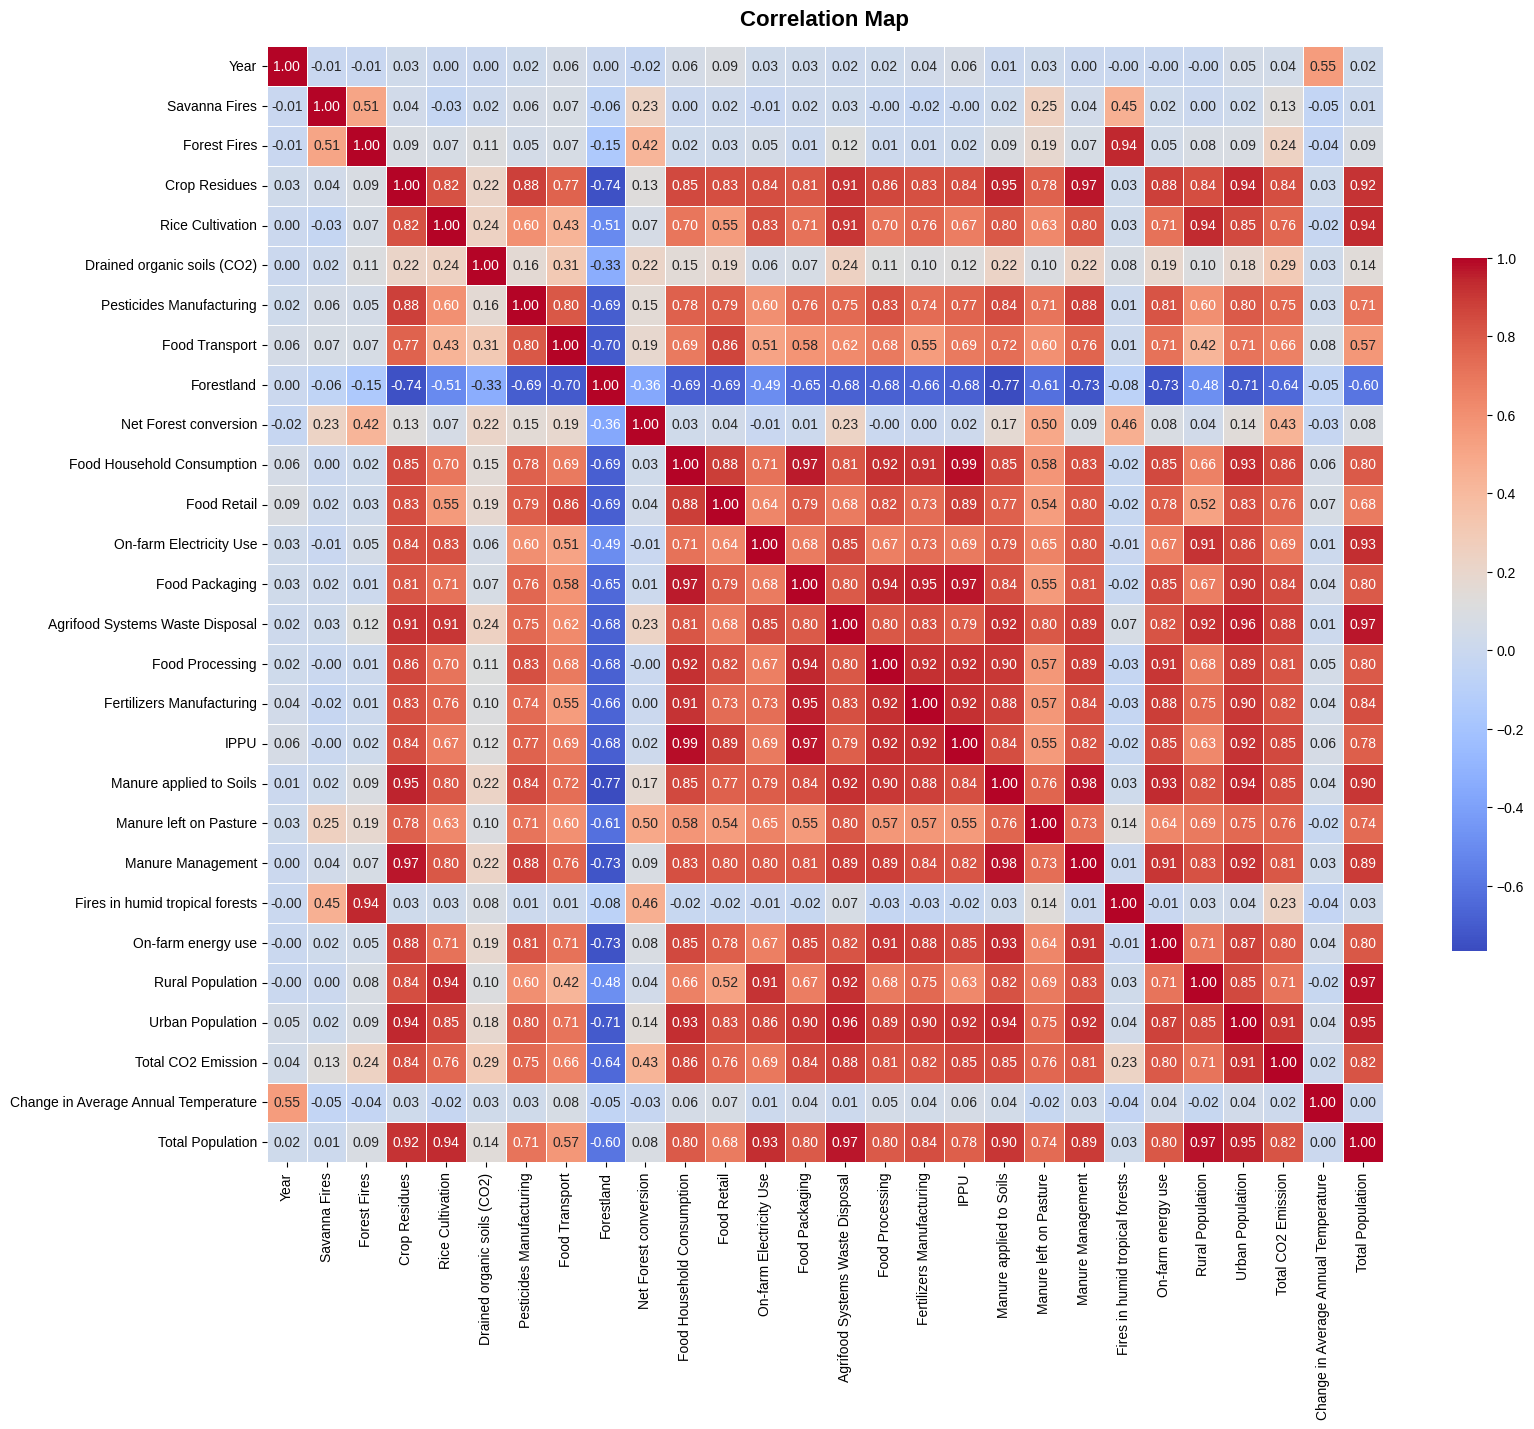

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.drop(['Food Supply Chain', 'LULUCF', 'Agricultural Activities', 'Industrial Process', 'Total Population - Male', 'Total Population - Female'], axis=1).corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Adding title
plt.title('Correlation Map', pad = 15, fontsize=16, fontweight='bold')

# Show plot
plt.show()

Correlation Matrix of 'LULUCF', 'Food Supply Chain', 'Agricultural Activities', 'Industrial Process', 'Rural Population', 'Urban Population', 'Change in Average Annual Temperature'

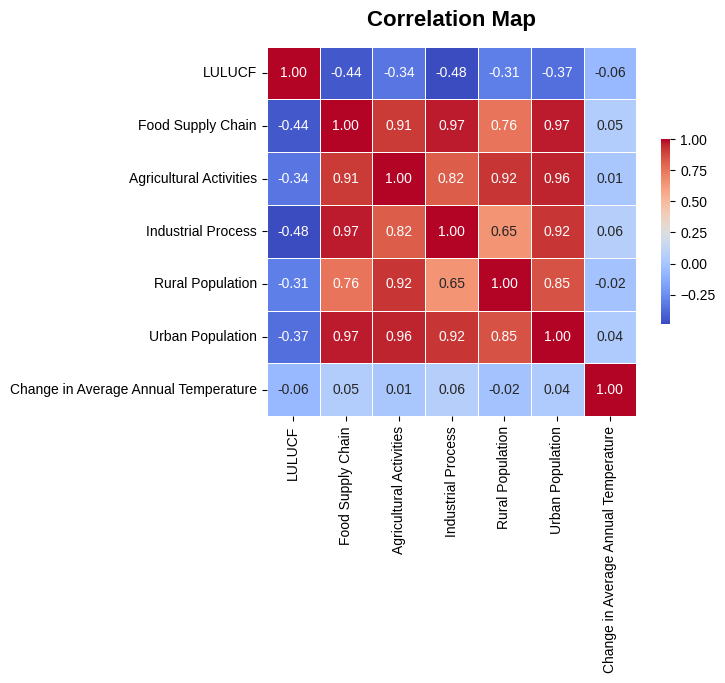

In [ ]:
# Calculate the correlation matrix
corr_matrix = df[['LULUCF', 'Food Supply Chain', 'Agricultural Activities', 'Industrial Process', 'Rural Population', 'Urban Population', 'Change in Average Annual Temperature']].corr()

# Set up the matplotlib figure
#plt.figure(figsize=(18, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Adding title
plt.title('Correlation Map', pad = 15, fontsize=16, fontweight='bold')

# Show plot
plt.show()

### Analyzing only China

In [ ]:
# Filter the data for China in df
df_china = df[df['Area'] == 'China']
df_china

Area  Year  Savanna Fires  Forest Fires  Crop Residues  \
1294  China  1990       313.4201      838.1820     23891.3751   
1295  China  1991       313.4201      838.1820     23467.5788   
1296  China  1992       313.4201      838.1820     23786.6542   
1297  China  1993       313.4201      838.1820     24248.5319   
1298  China  1994       313.4201      838.1820     23655.2917   
...     ...   ...            ...           ...            ...   
1413  China  2016       203.6436      580.8440     33089.6896   
1414  China  2017       160.5455      308.1398     33277.0413   
1415  China  2018       209.0857      668.9525     32991.2526   
1416  China  2019       253.5691      654.1619     33102.4711   
1417  China  2020       163.8876      603.8159     33384.8108   

      Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
1294       164915.2556                    3701.2430                    5924.0   
1295       162451.0626                    3701.2430                    5836.0   
1296       159831.9669                    3701.2430                    6005.0   
1297       151267.1262                    3699.9395                    6753.0   
1298       150236.3888                    3699.9395                    7660.0   
...                ...                          ...                       ...   
1413       151197.7594                    3858.3072                   10408.0   
1414       151203.6114                    3856.5655                    9824.0   
1415       148460.8469                    3856.4955                    8970.0   
1416       146004.7316                    3913.7395                    8210.0   
1417       147922.6112                    3916.9002                    8210.0   

      Food Transport   Forestland  ...  Total Population - Male  \
1294      15819.8581 -350983.5047  ...              601711211.0   
1295      17186.3186 -350983.5047  ...              610702306.0   
1296      17137.5226 -350983.5047  ...              617772271.0   
1297      19302.6595 -350983.5047  ...              624228451.0   
1298      15845.5199 -350983.5047  ...              630374296.0   
...              ...          ...  ...                      ...   
1413      35178.5177 -651765.3001  ...              717314568.0   
1414      36371.3410 -651765.3001  ...              721400823.0   
1415      37270.7021 -651765.3001  ...              724608064.0   
1416      36621.5886 -651765.3001  ...              726781914.0   
1417      35648.7214 -651765.3001  ...              727993760.0   

      Total Population - Female  Total CO2 Emission  \
1294                578768016.0        8.031127e+05   
1295                586980323.0        8.471899e+05   
1296                593373396.0        8.801073e+05   
1297                599223343.0        9.270107e+05   
1298                604763303.0        9.986559e+05   
...                         ...                 ...   
1413                684575113.0        2.720040e+06   
1414                688875134.0        2.766927e+06   
1415                692461405.0        2.840113e+06   
1416                695082117.0        2.902693e+06   
1417                696936022.0        3.039089e+06   

      Change in Average Annual Temperature  Continent       LULUCF  \
1294                              0.840333       Asia -346128.8344   
1295                              0.430917       Asia -346128.8344   
1296                              0.175250       Asia -346128.8344   
1297                              0.208833       Asia -346130.1379   
1298                              0.807750       Asia -346130.1379   
...                                    ...        ...          ...   
1413                              1.438667       Asia -647120.6983   
1414                              1.448333       Asia -647439.6323   
1415                              1.244167       Asia -647030.6274   
1416                              1.472417       Asia -646943.8296   
1417             

In [ ]:
# Filter the data for China in df2
df2_china = df2[df2['Area'] == 'China']
df2_china

Area  Year  GDP Per Capita (Current US$)
1271  China  1990                    347.578366
1272  China  1991                    359.213269
1273  China  1992                    423.304430
1274  China  1993                    525.365692
1275  China  1994                    473.489916
1276  China  1995                    609.604338
1277  China  1996                    709.415888
1278  China  1997                    781.742561
1279  China  1998                    828.594691
1280  China  1999                    873.297611
1281  China  2000                    959.360431
1282  China  2001                   1053.112314
1283  China  2002                   1148.514257
1284  China  2003                   1288.637491
1285  China  2004                   1508.667916
1286  China  2005                   1753.414192
1287  China  2006                   2099.219430
1288  China  2007                   2693.958732
1289  China  2008                   3468.327063
1290  China  2009                   3832.227457
1291  China  2010                   4550.473944
1292  China  2011                   5614.386022
1293  China  2012                   6300.582180
1294  China  2013                   7020.386074
1295  China  2014                   7636.074340
1296  China  2015                   8016.445595
1297  China  2016                   8094.390167
1298  China  2017                   8817.045608
1299  China  2018                   9905.406383
1300  China  2019                  10143.860220
1301  China  2020                  10408.719550

Total CO2 Emission (kt) and GDP Per Capita over Time in China

In [ ]:
# Create a figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add the bar chart for Total CO2 Emission to the figure
fig.add_trace(
    go.Bar(
        x=df_china['Year'],
        y=df_china['Total CO2 Emission'],
        name='Total CO2 Emission',
        marker=dict(color='rgba(50, 171, 96, 0.6)'),
    ),
    secondary_y=False,
)

# Add the line graph for GDP Per Capita to the figure
fig.add_trace(
    go.Scatter(
        x=df2_china['Year'],
        y=df2_china['GDP Per Capita (Current US$)'],
        name='GDP Per Capita (Current US$)',
        mode='lines+markers',
        line=dict(color='rgba(0, 0, 255, 0.7)'),
    ),
    secondary_y=True,
)

# Set the titles and axis labels
fig.update_layout(
    title_text='<b>Total CO2 Emission (kt) and GDP Per Capita over Time in China<b>',
    xaxis_title='Year',
    yaxis_title='Total CO2 Emission (kt)',
)

# Set the y-axis title for the secondary y-axis
fig.update_yaxes(title_text='GDP Per Capita (Current US$)', secondary_y=True)

# Customize the layout further to remove gridlines or make them less noticeable
fig.update_layout(
    xaxis=dict(
        showgrid=False,
    ),
    yaxis=dict(
        showgrid=False,
        gridcolor='rgba(242,242,242,1)',
    ),
    yaxis2=dict(
        showgrid=False,
        gridcolor='rgba(242,242,242,1)' ))

# Show the figure
fig.show()


Study the emission sources for China based on ALL CO2 emissions sources

In [ ]:
# Ensure 'Year' is a column, not an index, before melting
df_china.reset_index(inplace=True)

# Create a long-form df where the column names of emission sources become a single column
emission_source_columns = [
    'Forestland', 'Rice Cultivation', 'Savanna Fires', 'Forest Fires',
    'Drained organic soils (CO2)', 'Pesticides Manufacturing', 'Fertilizers Manufacturing',
    'IPPU', 'Food Transport', 'Food Household Consumption', 'Food Retail',
    'Food Packaging', 'Agrifood Systems Waste Disposal', 'Food Processing',
    'Crop Residues', 'On-farm Electricity Use', 'Manure applied to Soils',
    'Manure left on Pasture', 'Manure Management', 'On-farm energy use', 'Net Forest conversion',
    'Fires in humid tropical forests'
]
melted_china_data = df_china.melt(id_vars=['Area', 'Year'], value_vars=emission_source_columns,
                           var_name='CO2 Emission Source', value_name='CO2 Emissions')


# Create a figure with graph_objects
fig = go.Figure()

# Group the melted data by emission source and sum the emissions
grouped_data = melted_china_data.groupby('CO2 Emission Source')['CO2 Emissions'].sum().reset_index()

# Add a bar for each emission source
for index, row in grouped_data.iterrows():
    fig.add_trace(go.Bar(
        x=[row['CO2 Emission Source']],
        y=[row['CO2 Emissions']],
        name=row['CO2 Emission Source']
    ))

# Update the layout
fig.update_layout(
    title='<b>Total CO2 Emissions by Source in China<b>',
    xaxis_title='CO2 Emission Sources',
    yaxis_title='Total CO2 Emissions (kt CO2-equiv)',
    barmode='group',
    xaxis={'categoryorder': 'total descending'}
)

# Show the figure
fig.show()

### Analyzing only United States of America

In [ ]:
# Filter the data for United States of America
df_usa = df[df['Area'] == 'United States of America']
df_usa

Area  Year  Savanna Fires  Forest Fires  \
6591  United States of America  1990      1391.1481     1999.5617   
6592  United States of America  1991      1391.1481     1999.5617   
6593  United States of America  1992      1391.1481     1999.5617   
6594  United States of America  1993      1391.1481     1999.5617   
6595  United States of America  1994      1391.1481     1999.5617   
6596  United States of America  1995      1391.1481     1999.5617   
6597  United States of America  1996      1694.8841     3286.2536   
6598  United States of America  1997       757.1947     1553.0516   
6599  United States of America  1998      1225.4008     3099.3490   
6600  United States of America  1999      1288.5873     3578.5759   
6601  United States of America  2000      1385.9744     3687.6770   
6602  United States of America  2001       497.1015      534.9642   
6603  United States of America  2002      1111.7842     1475.6013   
6604  United States of America  2003      1188.3672     1224.2156   
6605  United States of America  2004      1672.1608     1201.6707   
6606  United States of America  2005      2406.4668      915.3977   
6607  United States of America  2006      1749.7266     1086.7729   
6608  United States of America  2007      1970.7496     1558.7559   
6609  United States of America  2008      1160.9667     2068.4252   
6610  United States of America  2009      1332.1128     1093.5759   
6611  United States of America  2010       741.2273      912.6399   
6612  United States of America  2011      2200.3468     1330.2757   
6613  United States of America  2012      1616.5661     1173.5953   
6614  United States of America  2013       813.4448     1284.5470   
6615  United States of America  2014       946.4730     1336.9865   
6616  United States of America  2015      1521.9270     2235.1868   
6617  United States of America  2016      1214.1887     1438.7519   
6618  United States of America  2017      1749.8832     2664.9144   
6619  United States of America  2018      1540.0409     2457.9409   
6620  United States of America  2019       988.5763     1190.9796   
6621  United States of America  2020      2031.3179     5405.3003   

      Crop Residues  Rice Cultivation  Drained organic soils (CO2)  \
6591     19193.1314         11195.520                   50713.3546   
6592     17574.1126         11029.312                   50713.3546   
6593     20964.8025         12421.402                   50713.3546   
6594     16761.5327         11235.602                   50566.2744   
6595     21370.6468         13151.110                   50418.1314   
6596     17800.1615         12266.758                   50644.8303   
6597     20507.4875         11120.550                   50592.6066   
6598     21112.9227         12306.350                   50567.2159   
6599     21686.8186         12917.184                   50635.6846   
6600     20870.3254         13928.446                   50729.4442   
6601     21221.4989         12052.530                   50822.9982   
6602     20442.3218         13143.172                   50758.8345   
6603     18976.1724         12718.832                   50769.6526   
6604     21084.5303         11886.028                   50769.9151   
6605     23324.6504         13186.782                   50727.2621   
6606     22274.5808         13341.524                   50679.6216   
6607     21149.1663         11187.974                   50625.6918   
6608     23547.3911         10898.482                   50563.8669   
6609     23926.2791         11802.728                   50502.9608   
6610     24815.3832         12306.350                   50474.0471   
6611     24102.1520         14336.910                   50470.9077   
6612     22949.6934         10378.886                   50446.6357   
6613     22132.1804         10624.768                   50395.0639   
6614     25374.1695          9791.964                   50278.6788   
6615     26451.8114         11632.208                   50220.1365 

In [ ]:
# Filter the data for United States of America
df2_usa = df2[df2['Area'] == 'United States of America']
df2_usa

Area  Year  GDP Per Capita (Current US$)
6386  United States of America  1990                   23888.60001
6387  United States of America  1991                   24342.25890
6388  United States of America  1992                   25418.99078
6389  United States of America  1993                   26387.29373
6390  United States of America  1994                   27694.85342
6391  United States of America  1995                   28690.87570
6392  United States of America  1996                   29967.71272
6393  United States of America  1997                   31459.13898
6394  United States of America  1998                   32853.67695
6395  United States of America  1999                   34515.39023
6396  United States of America  2000                   36329.95607
6397  United States of America  2001                   37133.62311
6398  United States of America  2002                   37997.75966
6399  United States of America  2003                   39490.27496
6400  United States of America  2004                   41724.63163
6401  United States of America  2005                   44123.40707
6402  United States of America  2006                   46302.00088
6403  United States of America  2007                   48050.22378
6404  United States of America  2008                   48570.04598
6405  United States of America  2009                   47194.94335
6406  United States of America  2010                   48650.64313
6407  United States of America  2011                   50065.96650
6408  United States of America  2012                   51784.41857
6409  United States of America  2013                   53291.12769
6410  United States of America  2014                   55123.84979
6411  United States of America  2015                   56762.72945
6412  United States of America  2016                   57866.74493
6413  United States of America  2017                   59907.75426
6414  United States of America  2018                   62823.30944
6415  United States of America  2019                   65120.39466
6416  United States of America  2020                   63528.63430

Total CO2 Emission (kt) and GDP Per Capita over Time in United States of America

In [ ]:
# Create a figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add the bar chart for Total CO2 Emission to the figure
fig.add_trace(
    go.Bar(
        x=df_usa['Year'],
        y=df_usa['Total CO2 Emission'],
        name='Total CO2 Emission',
        marker=dict(color='rgba(50, 171, 96, 0.6)'),
    ),
    secondary_y=False, # Specify that this goes on the primary y-axis
)

# Add the line graph for GDP Per Capita to the figure
fig.add_trace(
    go.Scatter(
        x=df2_usa['Year'],
        y=df2_usa['GDP Per Capita (Current US$)'],
        name='GDP Per Capita (Current US$)',
        mode='lines+markers',
        line=dict(color='rgba(0, 0, 255, 0.7)'),
    ),
    secondary_y=True,
)

# Set the titles and axis labels
fig.update_layout(
    title_text='<b>Total CO2 Emission (kt) and GDP Per Capita Over Time in United States of America<b>',
    xaxis_title='Year',
    yaxis_title='Total CO2 Emission (kt)',
)

# Set the y-axis title for the secondary y-axis
fig.update_yaxes(title_text='GDP Per Capita (Current US$)', secondary_y=True)

# Customize the layout further to remove gridlines or make them less noticeable
fig.update_layout(
    xaxis=dict(
        showgrid=False,
    ),
    yaxis=dict(
        showgrid=False,
        gridcolor='rgba(242,242,242,1)',
    ),
    yaxis2=dict(
        showgrid=False,
        gridcolor='rgba(242,242,242,1)' ))

# Show the figure
fig.show()


Time Series of CO2 Emission vs. Temperature (in Celcius) Change in United States of America

In [ ]:
# Normalize the data to ensure that each variable has a comparable scale
def normalizer(df_usa):
    #norm = (df_usa - df_usa.max()) / (df_usa.max() - df_usa.min())
    # Revised normalization to scale between 0 and 1
    norm = (df_usa - df_usa.min()) / (df_usa.max() - df_usa.min())
    return norm

temp_emission_usa = df_usa.groupby("Year").agg({"Change in Average Annual Temperature": "mean",
                                                  "Total CO2 Emission": "mean"})

norm_temp_usa = normalizer(temp_emission_usa)

# Create a Plotly figure
fig = go.Figure()

# Add traces for 'Total CO2 Emission' and 'Change in Average Annual Temperature'
fig.add_trace(go.Scatter(x=norm_temp_asia.index, y=norm_temp_usa['Total CO2 Emission'], mode='lines', name='Total CO2 Emission'))
fig.add_trace(go.Scatter(x=norm_temp_asia.index, y=norm_temp_usa['Change in Average Annual Temperature'], mode='lines', name='Change in Average Annual Temperature'))

# Customize the layout
fig.update_layout(title='<b>Normalized CO2 Emission vs. Change in Average Annual Temperature (in Celsius) in United States of America<b>',
                  xaxis_title='Year',
                  yaxis_title='Normalized Values')

# Show the figure
fig.show()

Study the emission sources for the United States of America based on ALL CO2 emissions sources

In [ ]:
# Ensure 'Year' is a column, not an index, before melting
df_usa.reset_index(inplace=True)

# Create a long-form df where the column names of emission sources become a single column
emission_source_columns = [
    'Forestland', 'Rice Cultivation', 'Savanna Fires', 'Forest Fires',
    'Drained organic soils (CO2)', 'Pesticides Manufacturing', 'Fertilizers Manufacturing',
    'IPPU', 'Food Transport', 'Food Household Consumption', 'Food Retail',
    'Food Packaging', 'Agrifood Systems Waste Disposal', 'Food Processing',
    'Crop Residues', 'On-farm Electricity Use', 'Manure applied to Soils',
    'Manure left on Pasture', 'Manure Management', 'On-farm energy use', 'Net Forest conversion',
    'Fires in humid tropical forests'
]
melted_usa_data = df_usa.melt(id_vars=['Area', 'Year'], value_vars=emission_source_columns,
                           var_name='CO2 Emission Source', value_name='CO2 Emissions')


# Create a figure with graph_objects
fig = go.Figure()

# Group the melted data by emission source and sum the emissions
grouped_data = melted_usa_data.groupby('CO2 Emission Source')['CO2 Emissions'].sum().reset_index()

# Add a bar for each emission source
for index, row in grouped_data.iterrows():
    fig.add_trace(go.Bar(
        x=[row['CO2 Emission Source']],
        y=[row['CO2 Emissions']],
        name=row['CO2 Emission Source']
    ))

# Update the layout
fig.update_layout(
    title='<b>Total CO2 Emissions by Source in the United States of America<b>',
    xaxis_title='CO2 Emission Sources',
    yaxis_title='Total CO2 Emissions (kt CO2-equiv)',
    barmode='group',
    xaxis={'categoryorder': 'total descending'}
)

# Show the figure
fig.show()

Study the emission sources for the United States of America based on all CO2 emissions sources from LULUCF

In [ ]:
# Create a long-form df where the column names of emission sources become a single column
LULUCF_source = ['Savanna Fires', 'Forest Fires', 'Drained organic soils (CO2)', 'Forestland',
     'Net Forest conversion', 'Fires in humid tropical forests'
]
melted_usa_data = df_usa.melt(id_vars=['Area', 'Year'], value_vars=LULUCF_source,
                           var_name='CO2 Emission Source', value_name='CO2 Emissions')

# Create a figure with graph_objects
fig = go.Figure()

# Add a bar for each emission source
for source in LULUCF_source:
    # Filter the data for this specific emission source
    source_data = melted_usa_data[melted_usa_data['CO2 Emission Source'] == source]
    # Add a bar to the figure
    fig.add_trace(go.Bar(
        x=[source],
        y=[source_data['CO2 Emissions'].sum()],
        name=source  # Legend entry
    ))

# Update the layout
fig.update_layout(
    title='<b>Total CO2 Emissions by LULUCF Source in the United States of America<b>',
    xaxis_title='CO2 Emission Sources',
    yaxis_title='Total CO2 Emissions (kt CO2-equiv)',
    barmode='group',
    xaxis={'categoryorder':'total descending'},
    legend_title='CO2 Emission Sources'
)

# Show the figure
fig.show()

Study the emission sources for the United States of America based on all CO2 emissions sources from Agricultural Activities

In [ ]:
# Create a long-form df where the column names of emission sources become a single column
agricultural_source = ['Crop Residues', 'Rice Cultivation', 'On-farm Electricity Use', 'Manure applied to Soils',
     'Manure left on Pasture', 'Manure Management', 'On-farm energy use'
]
melted_usa_data = df_usa.melt(id_vars=['Area', 'Year'], value_vars=agricultural_source,
                           var_name='CO2 Emission Source', value_name='CO2 Emissions')

# Create a figure with graph_objects
fig = go.Figure()

# Add a bar for each emission source
for source in agricultural_source:
    # Filter the data for this specific emission source
    source_data = melted_usa_data[melted_usa_data['CO2 Emission Source'] == source]
    # Add a bar to the figure
    fig.add_trace(go.Bar(
        x=[source],
        y=[source_data['CO2 Emissions'].sum()],
        name=source  # Legend entry
    ))

# Update the layout
fig.update_layout(
    title='<b>Total CO2 Emissions by Agricultural Activities Source in the United States of America<b>',
    xaxis_title='CO2 Emission Sources',
    yaxis_title='Total CO2 Emissions (kt CO2-equiv)',
    barmode='group',
    xaxis={'categoryorder':'total descending'},
    legend_title='CO2 Emission Sources'
)

# Show the figure
fig.show()

Study the emission sources for the United States of America based on all CO2 emissions sources from Food Supply Chain

In [ ]:
# Create a long-form df where the column names of emission sources become a single column
food_supply_chain_source = ['Food Transport', 'Food Household Consumption', 'Food Retail', 'Food Packaging',
     'Agrifood Systems Waste Disposal', 'Food Processing'
]
melted_usa_data = df_usa.melt(id_vars=['Area', 'Year'], value_vars=food_supply_chain_source,
                           var_name='CO2 Emission Source', value_name='CO2 Emissions')

# Create a figure with graph_objects
fig = go.Figure()

# Add a bar for each emission source
for source in food_supply_chain_source:
    # Filter the data for this specific emission source
    source_data = melted_usa_data[melted_usa_data['CO2 Emission Source'] == source]
    # Add a bar to the figure
    fig.add_trace(go.Bar(
        x=[source],
        y=[source_data['CO2 Emissions'].sum()],
        name=source  # Legend entry
    ))

# Update the layout
fig.update_layout(
    title='<b>Total CO2 Emissions by Food Supply Chain Source in the United States of America<b>',
    xaxis_title='CO2 Emission Sources',
    yaxis_title='Total CO2 Emissions (kt CO2-equiv)',
    barmode='group',
    xaxis={'categoryorder':'total descending'},
    legend_title='CO2 Emission Sources'
)

# Show the figure
fig.show()

Study the emission sources for the United States of America based on all CO2 emissions sources from Industrial Process

In [ ]:
# Create a long-form df where the column names of emission sources become a single column
industrial_process_source = ['Pesticides Manufacturing', 'Fertilizers Manufacturing', 'IPPU']
melted_usa_data = df_usa.melt(id_vars=['Area', 'Year'], value_vars=industrial_process_source,
                                var_name='CO2 Emission Source', value_name='CO2 Emissions')

# Create a figure with graph_objects
fig = go.Figure()

# Add a bar for each emission source
for source in industrial_process_source:
    # Filter the data for this specific emission source
    source_data = melted_usa_data[melted_usa_data['CO2 Emission Source'] == source]
    # Add a bar to the figure
    fig.add_trace(go.Bar(
        x=[source],
        y=[source_data['CO2 Emissions'].sum()],
        name=source
    ))

# Update the layout
fig.update_layout(
    title='<b>Total CO2 Emissions by Industrial Process Source in the United States of America<b>',
    xaxis_title='CO2 Emission Sources',
    yaxis_title='Total CO2 Emissions (kt CO2-equiv)',
    barmode='group',
    xaxis={'categoryorder':'total descending'},
    legend_title='CO2 Emission Sources'
)

# Show the figure
fig.show()

Study the emission sources for the United States of America based on the four major emission source categories

In [ ]:
# Calculate the total emissions for each category
usa_lulucf = df_usa['LULUCF'].sum()
usa_agricultural_activities = df_usa['Agricultural Activities'].sum()
usa_food_supply_chain = df_usa['Food Supply Chain'].sum()
usa_industrial_process = df_usa['Industrial Process'].sum()

# Create lists for the plot
usa_emission_categories = ['LULUCF', 'Agricultural Activities', 'Food Supply Chain', 'Industrial Process']
usa_total_emission = [usa_lulucf, usa_agricultural_activities, usa_food_supply_chain, usa_industrial_process]

# Create the bar chart
fig = go.Figure(data=[
    go.Bar(x=usa_emission_categories, y=usa_total_emission)
])

# Update the layout
fig.update_layout(
    title='<b>Total CO2 Emissions by Category in the United States of America<b>',
    xaxis_title='CO2 Emission Source Categories',
    yaxis_title='Total CO2 Emissions (kt CO2-equiv)'
)

# Show the figure
fig.show()


Find out the amount of CO2 generated from agrifood in all 6 continents in 2019

In [ ]:
# Filter the DataFrame for the year 2019 and sum the relevant agrifood emission columns by continent
y_2019 = df[df["Year"] == 2019]

# Sum these to get total agrifood emissions
agrifood_columns = [col for col in df.columns if 'IPPU' in col]
y_2019['Total IPPU CO2 Emission'] = y_2019[agrifood_columns].sum(axis=1)

# Now group by continent and sum the agrifood emissions
continent_emissions = y_2019.groupby('Continent')['Total IPPU CO2 Emission'].sum()

# Convert from kilotonnes to gigatonnes
gt_2019 = continent_emissions / 1_000_000

print("The amount of CO2 generated from IPPU in each continent in 2019:")
for continent, emissions in gt_2019.items():
    print(f"{continent}: {emissions:.2f} gigatonnes (gt)")

The amount of CO2 generated from IPPU in each continent in 2019:
Africa: 0.14 gigatonnes (gt)
Asia: 4.61 gigatonnes (gt)
Europe: 0.84 gigatonnes (gt)
North America: 0.81 gigatonnes (gt)
Oceania: 0.04 gigatonnes (gt)
South America: 0.16 gigatonnes (gt)


Create df for other countries to study further on Change in Average Annual Temperature vs Specific CO2 Emission Source

In [ ]:
# Filter the data for Brazil and Indonesia
df_brazil = df[df['Area'] == 'Brazil']
df_indonesia = df[df['Area'] == 'Indonesia']

After Log Transformation: Change in Average Annual Temperature vs Food Household Consumption CO2 Emissions for USA

In [ ]:
# Log transform
df_usa['log_temp'] = np.log(df_usa['Change in Average Annual Temperature'])
df_usa['log_fhc'] = np.log(df_usa['Food Household Consumption'])

# Create scatter plot
fig = px.scatter(df_usa, x='log_fhc', y='log_temp', color='Area',
                 labels={
                     'log_fhc': 'Log of Food Household Consumption CO2 Emissions',
                     'log_temp': 'Log of Change in Average Annual Temperature'
                 },
                 title='Log Change in Average Annual Temperature vs Log of Food Household Consumption Emissions')

# Display the figure
fig.show()

After Log Transformation: Change in Average Annual Temperature vs Food Household Consumption CO2 Emissions for China

In [ ]:
# Log transform
df_china['log_temp'] = np.log(df_china['Change in Average Annual Temperature'])
df_china['log_fhc'] = np.log(df_china['Food Household Consumption'])

# Create scatter plot
fig = px.scatter(df_china, x='log_fhc', y='log_temp', color='Area',
                 labels={
                     'log_fhc': 'Log of Food Household Consumption CO2 Emissions',
                     'log_temp': 'Log of Change in Average Annual Temperature'
                 },
                 title='Log Change in Average Annual Temperature vs Log of Food Household Consumption Emissions')

# Display the figure
fig.show()

After Log Transformation: Change in Average Annual Temperature vs Food Household Consumption CO2 Emissions for Brazil

In [ ]:
# Log transform
df_brazil['log_temp'] = np.log(df_brazil['Change in Average Annual Temperature'])
df_brazil['log_fhc'] = np.log(df_brazil['Food Household Consumption'])

# Create scatter plot
fig = px.scatter(df_brazil, x='log_fhc', y='log_temp', color='Area',
                 labels={
                     'log_fhc': 'Log of Food Household Consumption CO2 Emissions',
                     'log_temp': 'Log of Change in Average Annual Temperature'
                 },
                 title='Log Change in Average Annual Temperature vs Log of Food Household Consumption Emissions')

# Display the figure
fig.show()

After Log Transformation: Change in Average Annual Temperature vs Food Household Consumption CO2 Emissions for Indonesia

In [ ]:
# Log transform
df_indonesia['log_temp'] = np.log(df_indonesia['Change in Average Annual Temperature'])
df_indonesia['log_fhc'] = np.log(df_indonesia['Food Household Consumption'])

# Create scatter plot
fig = px.scatter(df_indonesia, x='log_fhc', y='log_temp', color='Area',
                 labels={
                     'log_fhc': 'Log of Food Household Consumption CO2 Emissions',
                     'log_temp': 'Log of Change in Average Annual Temperature'
                 },
                 title='Log Change in Average Annual Temperature vs Log of Food Household Consumption Emissions')

# Display the figure
fig.show()

After Log Transformation: Change in Average Annual Temperature vs On-farm energy use CO2 Emissions for United States of Amercia

In [ ]:
# Log transform
df_usa['log_temp'] = np.log(df_usa['Change in Average Annual Temperature'])
df_usa['log_onfarm'] = np.log(df_usa['On-farm energy use'])

# Create scatter plot
fig = px.scatter(df_usa, x='log_onfarm', y='log_temp', color='Area',
                 labels={
                     'log_onfarm': 'Log of On-farm energy use CO2 Emissions',
                     'log_temp': 'Log of Change in Average Annual Temperature'
                 },
                 title='Log Change in Average Annual Temperature vs Log of On-farm energy use')

# Display the figure
fig.show()

After Log Transformation: Change in Average Annual Temperature vs On-farm energy use CO2 Emissions for China

In [ ]:
# Log transform
df_china['log_temp'] = np.log(df_china['Change in Average Annual Temperature'])
df_china['log_onfarm'] = np.log(df_china['On-farm energy use'])

# Create scatter plot
fig = px.scatter(df_china, x='log_onfarm', y='log_temp', color='Area',
                 labels={
                     'log_onfarm': 'Log of On-farm energy use CO2 Emissions',
                     'log_temp': 'Log of Change in Average Annual Temperature'
                 },
                 title='Log Change in Average Annual Temperature vs Log of On-farm energy use')

# Display the figure
fig.show()

After Log Transformation: Change in Average Annual Temperature vs On-farm energy use CO2 Emissions for Brazil

In [ ]:
# Log transform
df_brazil['log_temp'] = np.log(df_brazil['Change in Average Annual Temperature'])
df_brazil['log_onfarm'] = np.log(df_brazil['On-farm energy use'])

# Create scatter plot
fig = px.scatter(df_brazil, x='log_onfarm', y='log_temp', color='Area',
                 labels={
                     'log_onfarm': 'Log of On-farm energy use CO2 Emissions',
                     'log_temp': 'Log of Change in Average Annual Temperature'
                 },
                 title='Log Change in Average Annual Temperature vs Log of On-farm energy use')

# Display the figure
fig.show()

After Log Transformation: Change in Average Annual Temperature vs On-farm energy use CO2 Emissions for Indonesia

In [ ]:
# Log transform
df_indonesia['log_temp'] = np.log(df_indonesia['Change in Average Annual Temperature'])
df_indonesia['log_onfarm'] = np.log(df_indonesia['On-farm energy use'])

# Create scatter plot
fig = px.scatter(df_indonesia, x='log_onfarm', y='log_temp', color='Area',
                 labels={
                     'log_onfarm': 'Log of On-farm energy use CO2 Emissions',
                     'log_temp': 'Log of Change in Average Annual Temperature'
                 },
                 title='Log Change in Average Annual Temperature vs Log of On-farm energy use')

# Display the figure
fig.show()

After Log Transformation: Change in Average Annual Temperature vs Food Retail CO2 Emissions for United States of America

In [ ]:
# Log transform
df_usa['log_temp'] = np.log(df_usa['Change in Average Annual Temperature'])
df_usa['log_foodretail'] = np.log(df_usa['Food Retail'])

# Create scatter plot
fig = px.scatter(df_usa, x='log_foodretail', y='log_temp', color='Area',
                 labels={
                     'log_foodretail': 'Log of Food Retail CO2 Emissions',
                     'log_temp': 'Log of Change in Average Annual Temperature'
                 },
                 title='Log Change in Average Annual Temperature vs Log of Food Retail')

# Display the figure
fig.show()

After Log Transformation: Change in Average Annual Temperature vs Food Retail CO2 Emissions for China

In [ ]:
# Log transform
df_china['log_temp'] = np.log(df_china['Change in Average Annual Temperature'])
df_china['log_foodretail'] = np.log(df_china['Food Retail'])

# Create scatter plot
fig = px.scatter(df_china, x='log_foodretail', y='log_temp', color='Area',
                 labels={
                     'log_foodretail': 'Log of Food Retail CO2 Emissions',
                     'log_temp': 'Log of Change in Average Annual Temperature'
                 },
                 title='Log Change in Average Annual Temperature vs Log of Food Retail')

# Display the figure
fig.show()

After Log Transformation: Change in Average Annual Temperature vs Food Retail CO2 Emissions for Brazil

In [ ]:
# Log transform
df_brazil['log_temp'] = np.log(df_brazil['Change in Average Annual Temperature'])
df_brazil['log_foodretail'] = np.log(df_brazil['Food Retail'])

# Create scatter plot
fig = px.scatter(df_brazil, x='log_foodretail', y='log_temp', color='Area',
                 labels={
                     'log_foodretail': 'Log of Food Retail CO2 Emissions',
                     'log_temp': 'Log of Change in Average Annual Temperature'
                 },
                 title='Log Change in Average Annual Temperature vs Log of Food Retail')

# Display the figure
fig.show()

After Log Transformation: Change in Average Annual Temperature vs Food Retail CO2 Emissions for Indonesia

In [ ]:
# Log transform
df_indonesia['log_temp'] = np.log(df_indonesia['Change in Average Annual Temperature'])
df_indonesia['log_foodretail'] = np.log(df_indonesia['Food Retail'])

# Create scatter plot
fig = px.scatter(df_indonesia, x='log_foodretail', y='log_temp', color='Area',
                 labels={
                     'log_foodretail': 'Log of Food Retail CO2 Emissions',
                     'log_temp': 'Log of Change in Average Annual Temperature'
                 },
                 title='Log Change in Average Annual Temperature vs Log of Food Retail')

# Display the figure
fig.show()

After Log Transformation: Change in Average Annual Temperature vs Forest Fires CO2 Emissions for United States of America

In [ ]:
# Log transform
df_usa['log_temp'] = np.log(df_usa['Change in Average Annual Temperature'])
df_usa['log_forestfires'] = np.log(df_usa['Forest Fires'])

# Create scatter plot
fig = px.scatter(df_usa, x='log_forestfires', y='log_temp', color='Area',
                 labels={
                     'log_forestfires': 'Log of Forest Fires CO2 Emissions',
                     'log_temp': 'Log of Change in Average Annual Temperature'
                 },
                 title='Log Change in Average Annual Temperature vs Log of Forest Fires')

# Display the figure
fig.show()

After Log Transformation: Change in Average Annual Temperature vs Forest Fires CO2 Emissions for China

In [ ]:
# Log transform
df_china['log_temp'] = np.log(df_china['Change in Average Annual Temperature'])
df_china['log_forestfires'] = np.log(df_china['Forest Fires'])

# Create scatter plot
fig = px.scatter(df_china, x='log_forestfires', y='log_temp', color='Area',
                 labels={
                     'log_forestfires': 'Log of Forest Fires CO2 Emissions',
                     'log_temp': 'Log of Change in Average Annual Temperature'
                 },
                 title='Log Change in Average Annual Temperature vs Log of Forest Fires')

# Display the figure
fig.show()

Before Log Transformation: Change in Average Annual Temperature vs IPPU CO2 Emissions

In [ ]:
fig = px.scatter(df, x='IPPU', y='Change in Average Annual Temperature',
                 labels={
                     'IPPU': 'IPPU CO2 Emissions',
                     'Change in Average Annual Temperature': 'Change in Average Annual Temperature'
                 },
                 title='Change in Average Annual Temperature vs IPPU CO2 Emissions')

fig.show()

After Log Transformation: Change in Average Annual Temperature vs IPPU CO2 Emissions

In [ ]:
# Log transform
df['log_temp'] = np.log(df['Change in Average Annual Temperature'])
df['log_IPPU'] = np.log(df['IPPU'])

# Create scatter plot
fig = px.scatter(df, x='log_IPPU', y='log_temp', color='Area',
                 labels={
                     'log_IPPU': 'Log of IPPU CO2 Emissions',
                     'log_temp': 'Log of Change in Average Annual Temperature'
                 },
                 title='Log Change in Average Annual Temperature vs Log of IPPU Emissions')

# Display the figure
fig.show()

Before Log Transformation: Change in Average Annual Temperature vs Industrial Process

In [ ]:
fig = px.scatter(df, x='Industrial Process', y='Change in Average Annual Temperature',
                 labels={
                     'Industrial Process': 'Industrial Process CO2 Emissions',
                     'Change in Average Annual Temperature': 'Change in Average Annual Temperature'
                 },
                 title='Change in Average Annual Temperature vs Industrial Process CO2 Emissions')

fig.show()

After Log Transformation: Change in Average Annual Temperature vs Industrial Process

In [ ]:
# Log transform
df['log_temp'] = np.log(df['Change in Average Annual Temperature'])
df['log_ip'] = np.log(df['Industrial Process'])

# Create scatter plot
fig = px.scatter(df, x='log_ip', y='log_temp', color='Area',
                 labels={
                     'log_ip': 'Log of Industrial Process CO2 Emissions',
                     'log_temp': 'Log of Change in Average Annual Temperature'
                 },
                 title='Log Change in Average Annual Temperature vs Log of Industrial Process Emissions')

# Display the figure
fig.show()

Correlation Matrix for United States of America

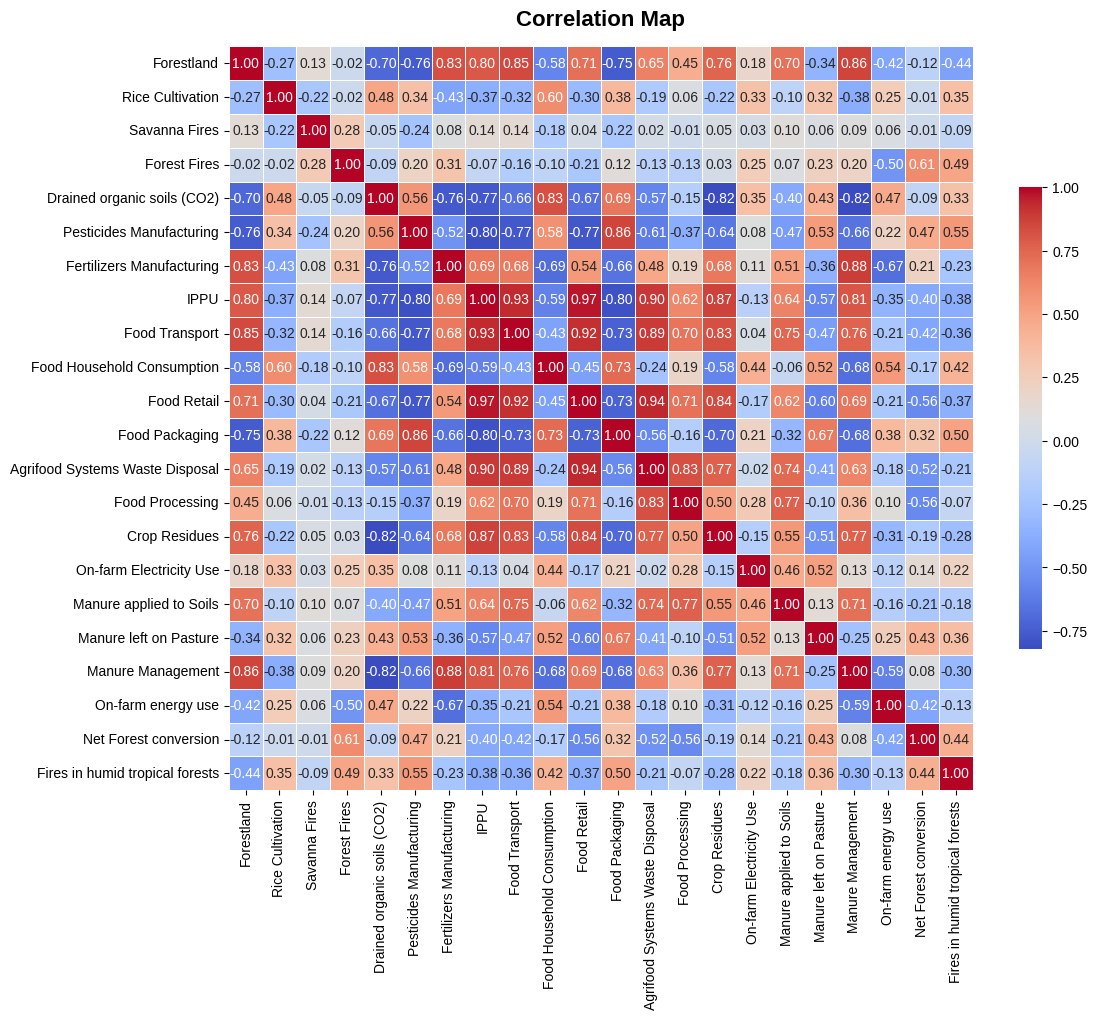

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_usa[['Forestland', 'Rice Cultivation', 'Savanna Fires', 'Forest Fires',
    'Drained organic soils (CO2)', 'Pesticides Manufacturing', 'Fertilizers Manufacturing',
    'IPPU', 'Food Transport', 'Food Household Consumption', 'Food Retail',
    'Food Packaging', 'Agrifood Systems Waste Disposal', 'Food Processing',
    'Crop Residues', 'On-farm Electricity Use', 'Manure applied to Soils',
    'Manure left on Pasture', 'Manure Management', 'On-farm energy use', 'Net Forest conversion',
    'Fires in humid tropical forests']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Adding title
plt.title('Correlation Map', pad = 15, fontsize=16, fontweight='bold')

# Show plot
plt.show()

# Research Question 1

### How can we forecast future CO2 emissions of specific agri-food source (IPPU) for United States of America?

## Forecasting Using Smoothing (ETS Models)

Let us zoom in on CO2 emission IPPU to try the forecasting analysis

In [ ]:
ippu_usa=df_usa[['Year', 'IPPU']]

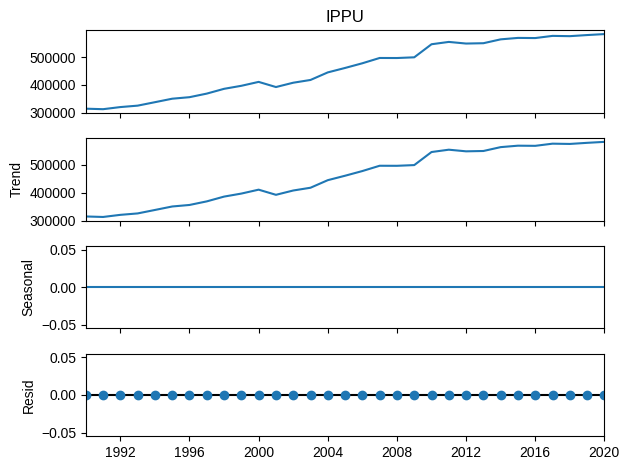

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert 'Year' to datetime and set as index
ippu_usa['Year'] = pd.to_datetime(ippu_usa['Year'], format='%Y')
ippu_usa.set_index('Year', inplace=True)

# Now, decompose the 'IPPU' column
decompose_data = seasonal_decompose(ippu_usa['IPPU'], model='add')
decompose_data.plot();

## Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit the simple exponential smoothing model
ets_model = SimpleExpSmoothing(ippu_usa)
ets_fit = ets_model.fit(smoothing_level=1, optimized=False)

ets_fit.fittedvalues

Year
1990-01-01    314656.6260
1991-01-01    314656.6260
1992-01-01    312837.4278
1993-01-01    320444.4469
1994-01-01    325588.2941
1995-01-01    338012.7498
1996-01-01    350527.3675
1997-01-01    356008.6224
1998-01-01    368921.9137
1999-01-01    386111.1599
2000-01-01    396966.7424
2001-01-01    411027.7612
2002-01-01    392502.7795
2003-01-01    408020.0257
2004-01-01    417974.4262
2005-01-01    445165.1724
2006-01-01    461169.9186
2007-01-01    478023.6740
2008-01-01    497050.7749
2009-01-01    496872.5574
2010-01-01    499434.6311
2011-01-01    546420.0236
2012-01-01    554787.6511
2013-01-01    548942.9598
2014-01-01    550123.6507
2015-01-01    564052.9511
2016-01-01    569232.2148
2017-01-01    568686.3602
2018-01-01    576485.9240
2019-01-01    575492.8148
2020-01-01    579469.2698
dtype: float64

### Line Plot for IPPU CO2 Emission Forecast Using Simple Exponential Smoothing

In [ ]:
forecast = ets_fit.forecast(10)

fig = px.line(x = ippu_usa.index, y = ippu_usa['IPPU'], labels = {'x': 'Year', 'y':'IPPU'})
fig.add_scatter(x = ets_fit.fittedvalues.index, y = ets_fit.fittedvalues, name = 'Fitted Values')
fig.add_scatter(x = forecast.index, y = forecast, name = 'Forecast')

fig.update_layout(title='<b>IPPU CO2 Emissions Forecast Using Simple Smoothing<b>', xaxis_title='Year', yaxis_title='IPPU CO2 Emissions')

fig.show()

## Double exponential smoothing - Holt's Model

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt's linear trend model
holt_model = ExponentialSmoothing(ippu_usa, trend='additive', seasonal=None, initialization_method="estimated")
ets_fit = holt_model.fit(smoothing_level=0.41, smoothing_trend=0.87, optimized=True)

# Forecast future values; for example, for the next 10 years
forecast = ets_fit.forecast(10)

# Display the forecasted values
forecast

2021-01-01    585449.697268
2022-01-01    588430.022526
2023-01-01    591410.347784
2024-01-01    594390.673041
2025-01-01    597370.998299
2026-01-01    600351.323557
2027-01-01    603331.648815
2028-01-01    606311.974073
2029-01-01    609292.299331
2030-01-01    612272.624589
Freq: AS-JAN, dtype: float64

### Line Plot for IPPU CO2 Emission Forecast Using Holt Exponential Smoothing

In [ ]:
fig = px.line(x = ippu_usa.index, y = ippu_usa['IPPU'], labels = {'x': 'Year', 'y':'CO2 emission from IPPU'})

fig.add_scatter(x = ets_fit.fittedvalues.index, y = ets_fit.fittedvalues, name = 'Fitted Values')
fig.add_scatter(x = forecast.index, y = forecast, name = 'Forecast')

fig.update_layout(title='<b>IPPU CO2 Emissions Forecast Using Holt Exponential Smoothing<b>', xaxis_title='Year', yaxis_title='IPPU CO2 Emissions')

fig.show()

Looking at the graph, the blue line represents the fitted values which appear to track the actual historical data closely, while the green line shows the forecasted emissions, which continue the trend observed in the historical data. The forecast appears to be a continuation of the existing trend without significant deviation, which seems reasonable given the steady trend in the historical data.



## Cross Validation for Holt's Model

In [ ]:
# Let us build a function that calculates MAPE, MSE, RMSE and MAE to automate some steps further:
def calculate_mape(actual_values, predicted_values):
    return (abs((actual_values - predicted_values) / actual_values)).mean() * 100

def calculate_mse(actual_values, predicted_values):
    return np.mean((actual_values - predicted_values) ** 2)

def calculate_rmse(actual_values, predicted_values):
    return np.sqrt(calculate_mse(actual_values, predicted_values))

def calculate_mae(actual_values, predicted_values):
    return np.mean(abs(actual_values - predicted_values))

In [ ]:
# Create a train and test sets:
train, test = ippu_usa.iloc[:round(len(ippu_usa) * 0.8)], ippu_usa.iloc[round(len(ippu_usa) * 0.8):]

In [ ]:
# Fit Simple ETS
ets_model_ets = SimpleExpSmoothing(train).fit(smoothing_level = 1, optimized=False)
forecast_ets = ets_model_ets.forecast(len(test))

In [ ]:
print('MAPE for Simple Exponential Smoothing:', calculate_mape(ippu_usa['IPPU'], forecast_ets ), "%")
print('MSE for Simple Exponential Smoothing:',  calculate_mse(ippu_usa['IPPU'], forecast_ets ))
print('RMSE for Simple Exponential Smoothing:',  calculate_rmse(ippu_usa['IPPU'], forecast_ets ))
print('MAE for Simple Exponential Smoothing:',  calculate_mae(ippu_usa['IPPU'], forecast_ets ))

MAPE for Simple Exponential Smoothing: 1.9621609480622126 %
MSE for Simple Exponential Smoothing: 154818049.59873414
RMSE for Simple Exponential Smoothing: 12442.590148306506
MAE for Simple Exponential Smoothing: 11334.929050000055


In [ ]:
# Fit Holt's model
ets_model_holt = ExponentialSmoothing(train, trend='additive', seasonal=None, initialization_method="estimated").fit(smoothing_level=0.41, smoothing_trend=0.87, optimized=False)

# Forecast future values for the length of the test set
forecast_holt = ets_model_holt.forecast(len(test))

In [ ]:
print('MAPE for Holt\'s Exponential Smoothing:', calculate_mape(ippu_usa['IPPU'], forecast_holt), "%")
print('MSE for Holt\'s Exponential Smoothing:',  calculate_mse(ippu_usa['IPPU'], forecast_holt))
print('RMSE for Holt\'s Exponential Smoothing:',  calculate_rmse(ippu_usa['IPPU'], forecast_holt))
print('MAE for Holt\'s Exponential Smoothing:',  calculate_mae(ippu_usa['IPPU'], forecast_holt))

MAPE for Holt's Exponential Smoothing: 0.22886830904030775 %
MSE for Holt's Exponential Smoothing: 2529585.7738488736
RMSE for Holt's Exponential Smoothing: 1590.4671558535479
MAE for Holt's Exponential Smoothing: 1312.412757966357


The results shown in the graph and the accompanying error metrics suggest that Holt's Exponential Smoothing model is performing quite well for forecasting the IPPU CO2 emissions for North America.

MAPE (Mean Absolute Percentage Error) of 0.22886830904030775% is extremely low, indicating that the model's forecasts are very close to the actual data, on average. This is a strong indicator of accuracy, as it implies that the forecasted values are within 0.23% of the actual values, on average.

MSE (Mean Squared Error) and RMSE (Root Mean Squared Error) are absolute measures of fit. MSE is the average of the squared differences between the forecasted and actual values, and RMSE is the square root of MSE, which puts it back in the same units as the original data (kilotonnes in this case). While these values may seem large, they need to be considered in the context of the scale of the data. Given that the emissions are in the hundreds of thousands of kilotonnes, an RMSE of 1590 kilotonnes is relatively small.

MAE (Mean Absolute Error) of 1312.412757966357 kilotonnes indicates the average magnitude of the errors between the forecasted and actual values. This is quite a low figure relative to the scale of the emissions data, suggesting that the model’s predictions are, on average, off by approximately 1312 kilotonnes.

While the forecast appears sensible and the model is performing well according to the given metrics, it's important to remain cautious about the forecast's accuracy over the long term, especially in the face of potential changes that are not captured by the model.

In [ ]:
total_emission_usa = df_usa['Total CO2 Emission'].sum()
print(f"Total CO2 Emissions for USA: {total_emission_usa}")

Total CO2 Emissions for USA: 23190884.411900003


## Forecasting using ARIMA model

### Check for stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(ippu_usa)

print(f'ADF Statistic {adf[0]}') # adf[0] - returns the ADF statistic value
print(f'p-value {adf[1]}') # adf[1] - returns the p-value -- if this value is high, the data is non-stationary


ADF Statistic -0.7521738616385897
p-value 0.8327687241000806


### Explore autocorrelation

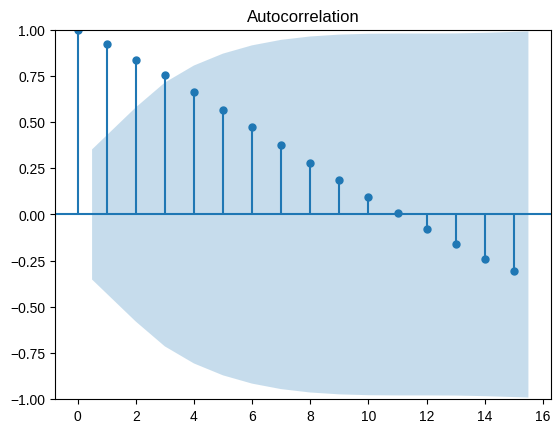

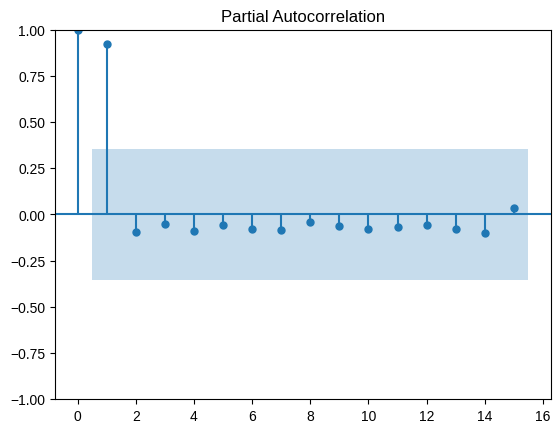

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ippu_usa).show()
plot_pacf(ippu_usa).show()

### Fit ARIMA model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model of order (p,d,q)
model = ARIMA(ippu_usa, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   IPPU   No. Observations:                   31
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -341.114
Date:                Mon, 04 Mar 2024   AIC                            690.229
Time:                        06:32:11   BIC                            695.965
Sample:                    01-01-1990   HQIC                           692.099
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.579e+05   1.37e+05      3.353      0.001     1.9e+05    7.26e+05
ar.L1          0.9892      0.064     15.423      0.000       0.864       1.115
ma.L1          0.3041      0.269      1.128      0.2

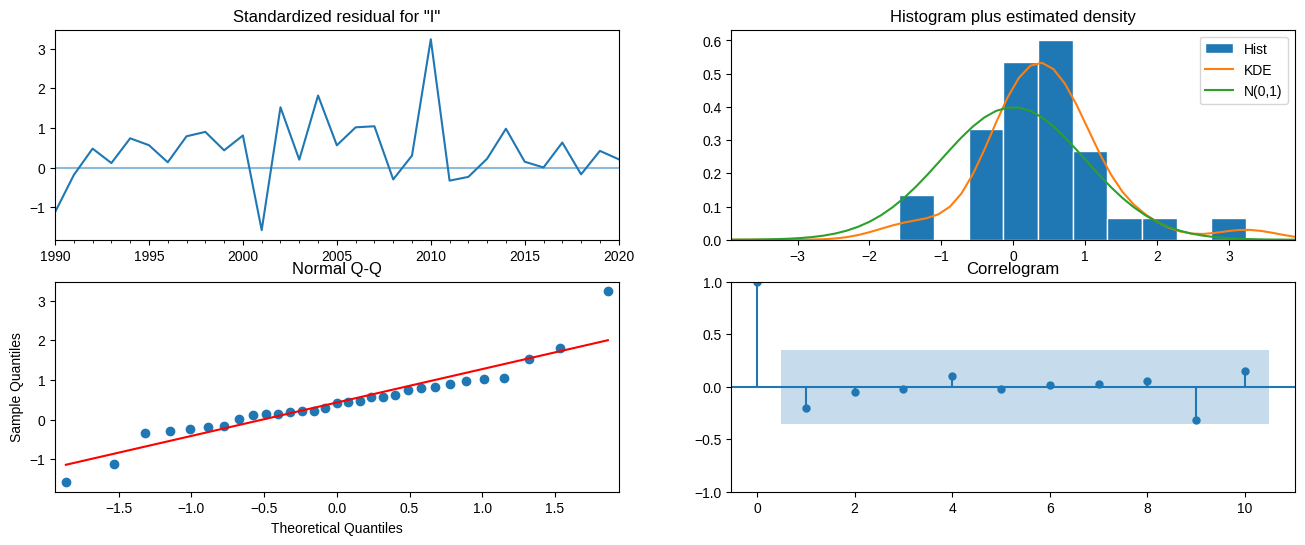

In [ ]:
model_fit.plot_diagnostics(figsize = (16,6)).show()

### Search for the best ARIMA model using pmdarima

pmdarima automates the search for the best ARIMA model, it goes through many p,q,d combinations, and selects the model with the lowest AIC

In [ ]:
#install pmdarima package
!pip install pmdarima
import pmdarima as pm

model_fit = pm.auto_arima(ippu_usa,
                             start_p=1, start_q=1, start_d=1,
                             max_p=12, max_q=12, max_d=12,
                            seasonal=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            trace = True,
                            stepwise = True,
                            stationary=True)
print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=697.892, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=802.085, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=704.528, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=778.966, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=899.389, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=700.667, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=697.985, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=765.477, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=691.831, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=697.237, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=696.097, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.776 seconds
                               SARIMAX Results                                
Dep. Variable:           

### Cross-validate the results

In [ ]:
arima = pm.auto_arima(train,
                             start_p=1, start_q=1, start_d=1,
                             max_p=12, max_q=12, max_d=12,
                            seasonal=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            trace = True,
                            stepwise = True,
                            stationary=False)
print('MAPE for the ARIMA model:', calculate_mape(test['IPPU'], arima.predict(len(test))),"%")

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=522.938, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=523.753, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=524.016, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=534.395, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.238 seconds
MAPE for the ARIMA model: 4.333193133727862 %


In [ ]:
fig = px.line(x = ippu_usa.index, y = ippu_usa['IPPU'], labels = {'x': 'Year', 'y':'IPPU'})

fig.add_scatter(x = ets_model_ets.fittedvalues.index, y = ets_model_ets.fittedvalues, name = 'ETS Fitted Values',
    line=dict(color='red') )
fig.add_scatter(x = test.index, y = ets_model_ets.forecast(len(test)), name = 'ETS Forecast',
    line=dict(color='red', dash='dash') )

fig.add_scatter(x = ets_model_holt.fittedvalues.index, y = ets_model_holt.fittedvalues, name = 'Holt Fitted Values',
    line=dict(color='green') )
fig.add_scatter(x = test.index, y = ets_model_holt.forecast(len(test)), name = 'Holt Forecast',
    line=dict(color='green', dash='dash') )

fig.add_scatter(x = arima.fit(train).predict_in_sample().index, y = arima.fit(train).predict_in_sample(), name = 'ARIMA Fitted Values',
    line=dict(color='purple') )
fig.add_scatter(x = test.index, y = arima.predict(len(test)), name = 'ARIMA Forecast',
    line=dict(color='purple', dash='dash') )

fig.update_layout(title='<b>IPPU CO2 Emissions Forecast Across Different Models<b>', xaxis_title='Year', yaxis_title='IPPU CO2 Emissions')

fig.show()

# Research Question 2

### How can we identify and choose the best features to predict the change in average annual temperature?

Dependent variable = 'Change in Average Annual Temperature'

In [ ]:
# Drop the columns from the original df
#df_new= df.drop(columns=['Area', 'Continent', 'Year', 'LULUCF', 'Agricultural Activities', 'Food Supply Chain', 'Industrial Process', 'Total Population - Male', 'Total Population - Female', 'Total CO2 Emission', 'Change in Average Annual Temperature', 'Total Population', 'log_ip', 'log_temp'], axis=1)

# Columns to keep
columns_to_keep = ['LULUCF', 'Agricultural Activities', 'Food Supply Chain', 'Industrial Process', 'Rural Population', 'Urban Population']

# Select only the specified columns from the dataframe
df_new = df[columns_to_keep]


### Add interactive variables

In [ ]:
df_new['Urban Food Chain Interaction'] = df_new['Food Supply Chain'] * df_new['Urban Population']
df_new.drop(['Food Supply Chain', 'Urban Population'], axis=1, inplace=True)


df_new['Rural Agriculture Interaction'] = df_new['Rural Population'] * df_new['Agricultural Activities']
df_new= df_new.drop(columns=['Rural Population', 'Agricultural Activities'])

### Compute Variance Inflation Factors (VIF)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Adding a constant column for intercept to the DataFrame
df_constant = add_constant(df_new)

# Initialize an empty DataFrame for VIF data
vif_data = pd.DataFrame()

# Calculate VIF for each feature
vif_data['Feature'] = df_new.columns
vif_data['VIF'] = [variance_inflation_factor(df_constant.values, i+1) for i in range(len(df_new.columns))]

# Sort the vif_data DataFrame by the 'VIF' column in descending order
vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)

# Display the sorted DataFrame
vif_data_sorted

Feature        VIF
2   Urban Food Chain Interaction  17.915647
1             Industrial Process  17.687452
3  Rural Agriculture Interaction   2.246855
0                         LULUCF   1.360156

### Create dummy variables for categorical variables using pd.get_dummies()

In [ ]:
df.columns

Index(['Area', 'Year', 'Savanna Fires', 'Forest Fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural Population', 'Urban Population', 'Total Population - Male',
       'Total Population - Female', 'Total CO2 Emission',
       'Change in Average Annual Temperature', 'Continent', 'LULUCF',
       'Agricultural Activities', 'Food Supply Chain', 'Industrial Process',
       'Total Population', 'log_temp', 'log_IPPU', 'log_ip'],
      dtype='object')

In [ ]:
df_new3 = df.copy()

# Create dummy variables for 'Area'
df_new3 = pd.get_dummies(data=df_new3, columns=['Area'], drop_first=True)

X = df_new3.drop(['Continent', 'Year', 'LULUCF', 'Agricultural Activities', 'Food Supply Chain', 'Industrial Process', 'Total Population - Male', 'Total Population - Female', 'Total CO2 Emission', 'Change in Average Annual Temperature', 'Total Population', 'log_ip', 'log_temp', 'log_IPPU'], axis=1)
X

Savanna Fires  Forest Fires  Crop Residues  Rice Cultivation  \
0           14.7237        0.0557       205.6077          686.0000   
1           14.7237        0.0557       209.4971          678.1600   
2           14.7237        0.0557       196.5341          686.0000   
3           14.7237        0.0557       230.8175          686.0000   
4           14.7237        0.0557       242.0494          705.6000   
...             ...           ...            ...               ...   
6960      1190.0089      232.5068        70.9451            7.4088   
6961      1431.1407      131.1324       108.6262            7.9458   
6962      1557.5830      221.6222       109.9835            8.1399   
6963      1591.6049      171.0262        45.4574            7.8322   
6964       481.9027       48.4197       108.3022            7.9733   

      Drained organic soils (CO2)  Pesticides Manufacturing  Food Transport  \
0                             0.0                 11.807483         63.1152   
1                             0.0                 11.712073         61.2125   
2                             0.0                 11.712073         53.3170   
3                             0.0                 11.712073         54.3617   
4                             0.0                 11.712073         53.9874   
...                           ...                       ...             ...   
6960                          0.0                 75.000000        251.1465   
6961                          0.0                 67.000000        255.7975   
6962                          0.0                 66.000000        327.0897   
6963                          0.0                 73.000000        290.1893   
6964                          0.0                 73.000000        238.7639   

      Forestland  Net Forest conversion  Food Household Consumption  ...  \
0     -2388.8030                 0.0000                     79.0851  ...   
1     -2388.8030                 0.0000                     80.4885  ...   
2     -2388.8030                 0.0000                     80.7692  ...   
3     -2388.8030                 0.0000                     85.0678  ...   
4     -2388.8030                 0.0000                     88.8058  ...   
...          ...                    ...                         ...  ...   
6960  76500.2982             10662.4408                    251.2681  ...   
6961  76500.2982             10662.4408                    203.1236  ...   
6962  76500.2982             10662.4408                    211.1539  ...   
6963  76500.2982             10662.4408                    228.6381  ...   
6964  76500.2982             10662.4408                    213.9211  ...   

      Area_Uzbekistan  Area_Vanuatu  Area_Venezuela (Bolivarian Republic of)  \
0                   0             0                                        0   
1                   0             0                                        0   
2                   0             0                                        0   
3                   0             0                                        0   
4                   0             0                                        0   
...               ...           ...                                      ...   
6960                0             0                                        0   
6961                0             0                                        0   
6962                0             0                                        0   
6963                0             0                                        0   
6964                0             0                                        0   

      Area_Viet Nam  Area_Wallis and Futuna Islands  Area_Western Sahara  \
0                 0                               0                    0   
1                 0                               0                    0   
2                 0                               0                    0   
3                 0                   

In [ ]:
#y = df_new2['Change in Average Annual Temperature']
y = df_new3['Change in Average Annual Temperature']

y.shape[0]

6965

In [ ]:
# Check for NaN and infinite values in X and y
print("NaNs in X:", X.isna().sum().sum())

NaNs in X: 0


In [ ]:
# Scaling using standard scaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_ss=ss.fit_transform(X)

In [ ]:
# Performing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_ss,y,test_size=0.2,random_state=0)

### Linear Regression

In [ ]:
# Linear Regression
mr=LinearRegression()
mr.fit(X_train,y_train)
y_pred=mr.predict(X_test)
print("MAPE for Linear Regression:",mean_absolute_percentage_error(y_test,y_pred))
print("MAE for Linear Regression:",mean_absolute_error(y_test,y_pred))
print("MSE for Linear Regression:",mean_squared_error(y_test,y_pred))
print("RMSE for Linear Regression:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score for Linear Regression:",r2_score(y_test,y_pred))

MAPE for Linear Regression: 1.1878700013250905
MAE for Linear Regression: 0.36965319245405315
MSE for Linear Regression: 0.25291600969127875
RMSE for Linear Regression: 0.5029075558104876
R2 Score for Linear Regression: 0.21530868231312095


In [ ]:
# Create a figure with subplots
fig = make_subplots(rows=1, cols=1)

# Add scatter plot for actual vs predicted values
fig.add_trace(
    go.Scatter(
        x=y_test,
        y=y_pred,
        mode='markers',
        name='Actual vs Predicted'
    )
)

# Add line for perfect predictions
fig.add_trace(
    go.Scatter(
        x=y_test,
        y=y_test,
        mode='lines',
        name='Perfect Prediction'
    )
)

# Set plot titles and axis labels
fig.update_layout(
    title='Actual vs Predicted Values for Linear Regression',
    xaxis_title='Actual Values',
    yaxis_title='Predicted Values'
)

# Show the figure
fig.show()

### Random Forest Regressor

Utilizing RandomizedSearchCV - particularly useful when you have a large hyperparameter space and prefer to sample a subset of it, or when each evaluation of the model is expensive (either in terms of compute time or cost).

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid to search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Randomized Search with the Random Forest model and the parameter distributions
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=param_dist,
    n_iter=100, # you can change the number of iterations
    cv=5,
    random_state=0,
    n_jobs=-1,
    verbose=2
)

# Fit the Randomized Search to the data
random_search.fit(X_train, y_train)

# Get the best estimator
best_rf = random_search.best_estimator_

# Make predictions using the best found parameters
y_pred1 = best_rf.predict(X_test)

# Calculate metrics/
print("MAPE for Random Forest Regressor:", mean_absolute_percentage_error(y_test, y_pred1))
print("MAE for Random Forest Regressor:", mean_absolute_error(y_test, y_pred1))
print("MSE for Random Forest Regressor:", mean_squared_error(y_test, y_pred1))
print("RMSE for Random Forest Regressor:", np.sqrt(mean_squared_error(y_test, y_pred1)))
print("R2 score for Random Forest Regressor:", r2_score(y_test, y_pred1))

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
MAPE for Random Forest Regressor: 0.8475211630705888
MAE for Random Forest Regressor: 0.29666429668105826
MSE for Random Forest Regressor: 0.1701825743581975
RMSE for Random Forest Regressor: 0.4125319070789525
R2 score for Random Forest Regressor: 0.4719955107488629
Best parameters found:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}


In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(best_rf, X_test, y_test, n_repeats=30, random_state=0, n_jobs=-1)

# Convert to DataFrame for easier handling
perm_importance_df = pd.DataFrame({'features': X.columns,
                                   'importances_mean': result.importances_mean})

# Sort by importance and select top 10
top_10_features = perm_importance_df.sort_values(by='importances_mean', ascending=False).head(10)

# Plot using Plotly
fig = px.bar(top_10_features, x='importances_mean', y='features', orientation='h',
             title='Top 10 Feature Importances',
             labels={'features': 'Feature', 'importances_mean': 'Mean Importance Score'})

# Update layout for clarity
fig.update_layout(yaxis=dict(autorange="reversed"))  # To display the most important feature on top
fig.show()

In [ ]:
# Create a figure with subplots
fig = make_subplots(rows=1, cols=1)

# Add scatter plot for actual vs predicted values
fig.add_trace(
    go.Scatter(
        x=y_test,
        y=y_pred1,
        mode='markers',
        name='Actual vs Predicted'
    )
)

# Add line for perfect predictions
fig.add_trace(
    go.Scatter(
        x=y_test,
        y=y_test,
        mode='lines',
        name='Perfect Prediction'
    )
)

# Set plot titles and axis labels
fig.update_layout(
    title='Actual vs Predicted Values Using Random Forest Regressor',
    xaxis_title='Actual Values',
    yaxis_title='Predicted Values'
)

# Show the figure
fig.show()

### Gradient Boosting Regressor

In [ ]:
# Gradient Boosting Regressor
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred3=gb.predict(X_test)
y_pred3
print("MAE for Gradient Boosting Regressor:",mean_absolute_percentage_error(y_test,y_pred3))
print("MAE for Gradient Boosting Regressor:",mean_absolute_error(y_test,y_pred3))
print("MSE for Gradient Boosting Regressor:",mean_squared_error(y_test,y_pred3))
print("RMSE for Gradient Boosting Regressor:",np.sqrt(mean_squared_error(y_test,y_pred3)))
print("R2 score for Gradient Boosting Regressor:",r2_score(y_test,y_pred3))

MAE for Gradient Boosting Regressor: 1.1625749523798818
MAE for Gradient Boosting Regressor: 0.3590260169667104
MSE for Gradient Boosting Regressor: 0.2371923615980431
RMSE for Gradient Boosting Regressor: 0.4870239846229784
R2 score for Gradient Boosting Regressor: 0.2640925064616455


### XGB Regressor

In [ ]:
# XGB Regressor
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
y_pred4=xgb.predict(X_test)
y_pred4
print("MAPE for XGB Regressor:",mean_absolute_percentage_error(y_test,y_pred4))
print("MAE for XGB Regressor:",mean_absolute_error(y_test,y_pred4))
print("MSE for XGB Regressor::",mean_squared_error(y_test,y_pred4))
print("RMSE for XGB Regressor::",np.sqrt(mean_squared_error(y_test,y_pred4)))
print("R2 score for XGB Regressor::",r2_score(y_test,y_pred4))

MAPE for XGB Regressor: 0.8755072208479165
MAE for XGB Regressor: 0.3039071282683054
MSE for XGB Regressor:: 0.1744804608575772
RMSE for XGB Regressor:: 0.4177085836532177
R2 score for XGB Regressor:: 0.45866098825428636
